## 3) Exploratory data analysis (EDA)

### (a) Preliminary EDA

The `merged` dataset contains 22'331 rows and 595 variables. To start, we take a look at the number of outliers of the variable `Air_log_price`. We see that there are only 37 observations that do not lie within [q1 - 1.5IQR, q3 + 1.5IQR].

In [167]:
merged.shape # (22331, 730)

(22331, 730)

In [168]:
quantiles = merged.Air_log_price.quantile([.25, .75])
iqr = quantiles.iloc[1] - quantiles.iloc[0]
upper_bounds = quantiles.iloc[1] + 1.5*iqr
lower_bounds = quantiles.iloc[0] - 1.5*iqr

merged_wo_outliers = merged.loc[(merged.Air_log_price <= upper_bounds) & 
                                (merged.Air_log_price >= lower_bounds), :]
merged_wo_outliers.shape # (22294, 730) 

(22294, 730)

The dataset without the outliers is plotted below. The `Air_log_price` is heavy-tailed.

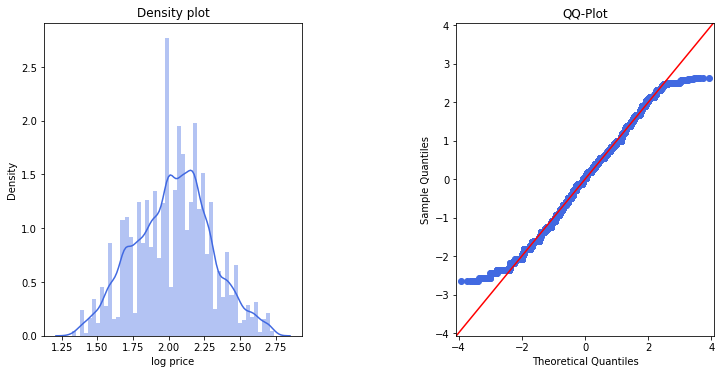

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(wspace=0.6, top=0.85) 

y = merged_wo_outliers.Air_log_price

# Density plot
sns.distplot(y, ax=axes[0], color=col1)
axes[0].set_title("Density plot")
axes[0].set_ylabel("Density")
axes[0].set_xlabel("log price")

# QQ plot
stdized = (y - np.mean(y)) / np.std(y)
sm.qqplot(stdized, line='45', ax=axes[1], color=col1)
axes[1].set_title("QQ-Plot");

#### Airbnb prices: Size and location

Next, we take a look at the relationship between the log airbnb prices and the aggregated log airbnb prices. 

**Airbnb price and suburbs**

*Summary statistics*

To start we take a look at the mean, median and standard deviations of the log airbnb prices, bedrooms and log prices per bedrooms. Some differences between the suburbs can be observed, irrespective of whether the log price is taken or the log price is divided by the number of bedrooms.

In [170]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_neighbourhood_cleansed']]
tmp['Air_log_price_by_bedroom'] = tmp.Air_log_price / tmp.Air_bedrooms
tmp = tmp.replace([np.inf, -np.inf], np.nan).dropna(how='all')
tmp_agg = tmp.groupby(by='Air_neighbourhood_cleansed').agg(['mean', 'median', np.std, 'count'])
tmp_agg
tmp_agg.sort_values(by=[('Air_log_price_by_bedroom', 'median')])

Air_log_price                            \
                                    mean    median       std count   
Air_neighbourhood_cleansed                                           
bayside                         2.121149  2.113943  0.293879   340   
yarra ranges                    2.250385  2.255273  0.229276   717   
frankston                       2.030197  2.008517  0.290892   172   
maroondah                       1.902195  1.875061  0.303675   115   
whittlesea                      1.804714  1.698970  0.292812   136   
brimbank                        1.775058  1.724276  0.272786   105   
manningham                      2.027857  2.037426  0.283175   295   
banyule                         1.891279  1.875061  0.273019   198   
hume                            1.884764  1.778151  0.335742   167   
wyndham                         1.885300  1.812913  0.303469   421   
maribyrnong                     1.940806  1.949390  0.277978   432   
hobsons bay                     2.018927  2.000000  0.288412   236   
melton                          1.887076  1.851258  0.321886    95   
greater dandenong               1.809842  1.703270  0.274704   142   
knox                            1.898144  1.863323  0.264018   173   
whitehorse                      1.899529  1.903090  0.264791   609   
kingston                        2.009164  2.000000  0.279281   304   
glen eira                       1.961247  1.929389  0.280349   622   
casey                           1.940390  1.875061  0.302238   146   
monash                          1.869782  1.778151  0.288490   557   
darebin                         1.919059  1.903090  0.255561   681   
moreland                        1.907004  1.903090  0.263840   947   
moonee valley                   1.915594  1.897627  0.259950   333   
boroondara                      1.958773  1.949390  0.264298   626   
cardinia                        2.130519  2.176091  0.264310   121   
melbourne                       2.082248  2.096910  0.233782  7210   
port phillip                    2.084399  2.079181  0.241634  2726   
yarra                           2.053429  2.060698  0.248421  2012   
stonnington                     2.056527  2.056905  0.240172  1569   
nillumbik                       2.071006  2.079181  0.209036    87   

                           Air_bedrooms                         \
                                   mean median       std count   
Air_neighbourhood_cleansed                                       
bayside                        1.879412    2.0  1.099820   340   
yarra ranges                   1.782427    1.0  1.202917   717   
frankston                      1.877907    1.0  1.200478   172   
maroondah                      1.695652    1.0  1.069300   115   
whittlesea                     1.522059    1.0  1.074740   136   
brimbank                       1.580952    1.0  1.166693   105   
manningham                     1.745763    1.0  1.172143   295   
banyule                        1.616162    1.0  1.155056   198   
hume                           1.862275    1.0  1.455841   167   
wyndham                        1.859524    1.0  1.365018   420   
maribyrnong                    1.620370    1.0  0.979773   432   
hobsons bay                    1.673729    1.0  1.001864   236   
melton                         1.505263    1.0  1.174858    95   
greater dandenong              1.514085    1.0  1.036469   142   
knox                           1.653179    1.0  1.149294   173   
whitehorse                     1.556650    1.0  0.973578   609   
kingston                       1.766447    1.0  1.138028   304   
glen eira                      1.566828    1.0  0.952481   621   
casey                          1.828767    1.0  1.304420   146   
monash                         1.551167    1.0  1.131460   557   
darebin                        1.462555    1.0  0.823635   681   
moreland                       1.375924    1.0  0.758442   947   
moonee valley                  1.450450    1.0  0.811128   333   


In [171]:
# previously cell 97
pickle.dump(tmp_agg, open("airbnb_price_suburbs.p", "wb"))
tmp_agg = pickle.load(open("airbnb_price_suburbs.p", "rb"))

*Plots*

The relationship are plotted next. We first start by plotting the prices merged according to the room type and and then switch to the property type.

*Room type*

We plot the values of `Air_log_price_suburb_same_room_type` against the log price of the reference objects of the same room type. A positive relationship between `Air_log_price_suburb_same_room_type` and the log price of the reference object is observed.

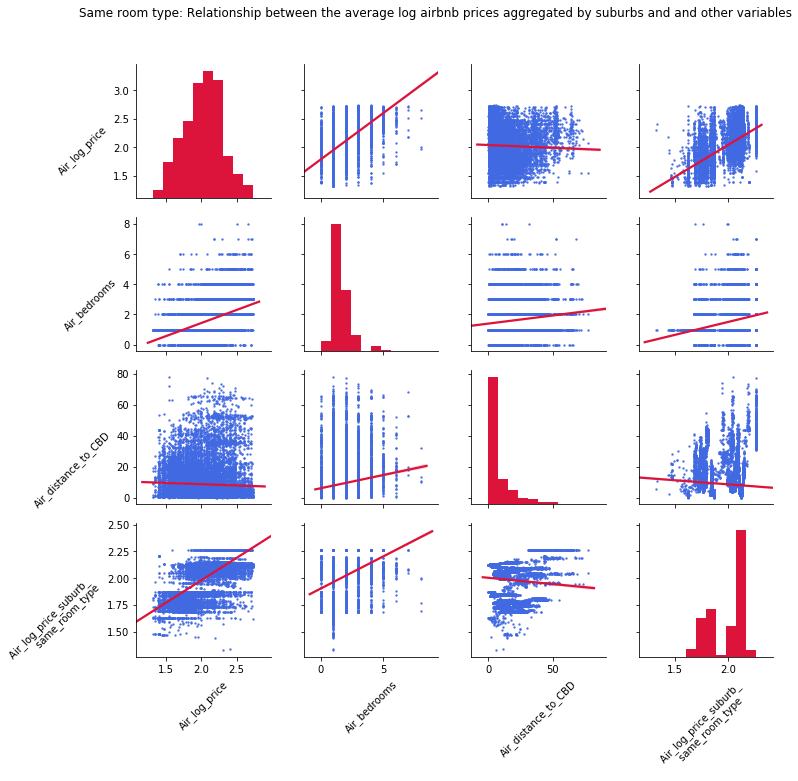

In [172]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_distance_to_CBD', 
                     'Air_log_price_suburb_same_room_type']]
tmp.replace([np.inf, -np.inf], np.nan, inplace=True)
tmp.rename(columns={'Air_log_price_suburb_same_room_type': 'Air_log_price_suburb_ \n same_room_type'},
          inplace=True)
g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})
#g = sns.PairGrid(tmp)
#g.map_diag(sns.kdeplot)
#g.map_offdiag(sns.kdeplot, n_levels=6)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Same room type: Relationship between the average log airbnb prices aggregated by suburbs and and other variables")
g.fig.subplots_adjust(top=0.9);

A closer look at the relationship between `Air_log_price` and `Air_log_price_suburb_same_room_type` is taken in the next plot.

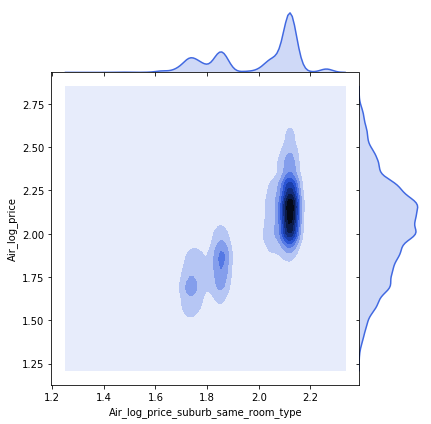

In [173]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_distance_to_CBD', 
                     'Air_log_price_suburb_same_room_type']]
tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='Air_log_price_suburb_same_room_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1);

In [174]:
tmp.dropna().shape # 22280

(22280, 4)

*Property type*

Now, we create the same plots for equal property types. The effect of the variable `Air_log_price_suburb_same_property_type` is smaller than for `Air_log_price_suburb_same_room_type`.

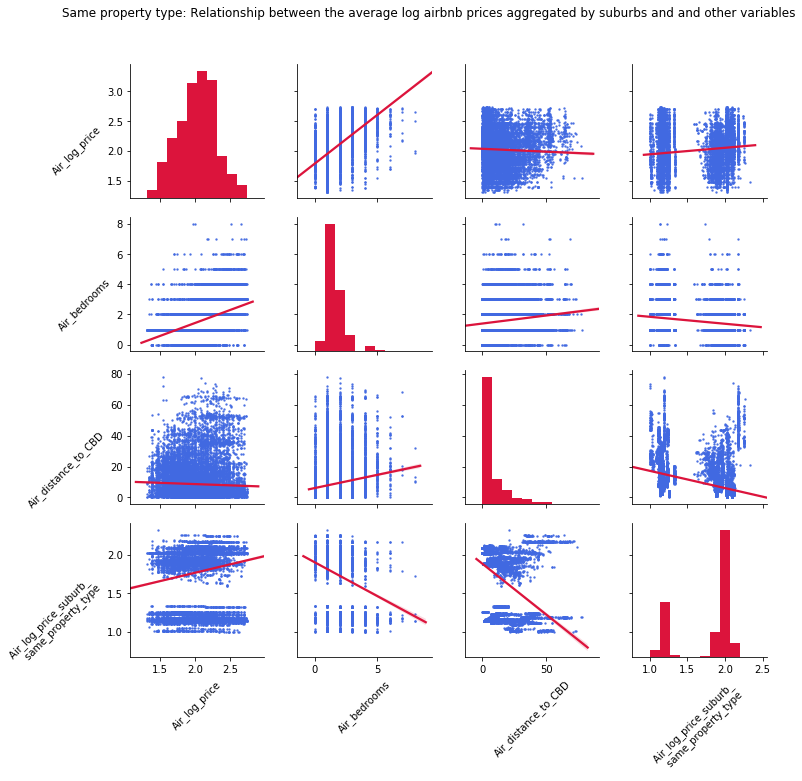

In [175]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_distance_to_CBD', 
                     'Air_log_price_suburb_same_property_type']]
tmp.rename(columns={'Air_log_price_suburb_same_property_type': 'Air_log_price_suburb_ \n same_property_type'},
          inplace=True)
tmp.replace([np.inf, -np.inf], np.nan, inplace=True)
g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})

new_labels = 'Air_log_price Air_bedrooms Air_distance_to_CBD Air_log_price_suburb_ \n same_property_type'

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Same property type: Relationship between the average log airbnb prices aggregated by suburbs and and other variables")
g.fig.subplots_adjust(top=0.9);

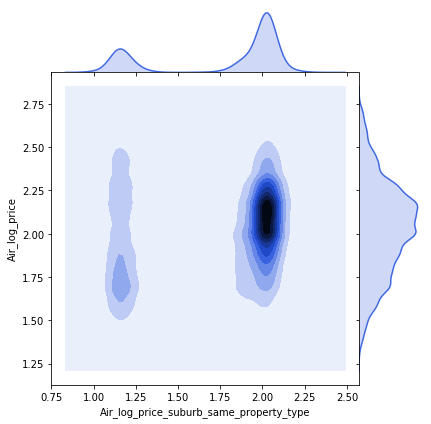

In [176]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_distance_to_CBD', 
                     'Air_log_price_suburb_same_property_type']]
tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='Air_log_price_suburb_same_property_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1);

In [177]:
tmp.dropna().shape # 22286

(22286, 4)

**Airbnb price and constructed airbnb price variables** 

In this section, the constructed airbnb price variables are inspected. Since the effect might be different w.r.t the average distance of the nearest neighbour, we also create buckets related to the distance to the reference observation and analyze the relationships separately. We do this only for the room type.

*Room type*

We start with the room type and create the buckets. Below the distribution of the distance to the nearest neighbour is plotted. The distance is at most 500 meters because the nearest neighbour was selected from the set of observations that are at most 500 meters away from the reference object. In many cases the distance is below 50 meters.

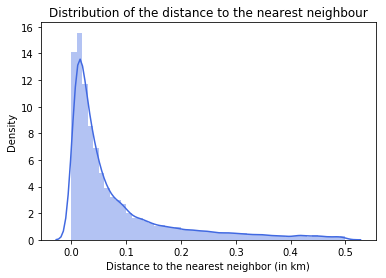

In [178]:
tmp = merged_wo_outliers.loc[:, 'dist_Entire home/apt_nearest']
tmp.shape # (22331, )
tmp.dropna(inplace=True)
tmp.shape # 19948
fig, ax = plt.subplots(1,1)
sns.distplot(tmp, ax=ax, color=col1);
ax.set_title("Distribution of the distance to the nearest neighbour")
ax.set_xlabel("Distance to the nearest neighbor (in km)")
ax.set_ylabel("Density");

Then, we create 3 buckets for the distance and store it in the variable `Air_dist_group` according of the distance of the nearest neighbour. The following groups are defined: 
- Group 1: [0; 0.05]
- Group 2: (0.05; 0.1]
- Group 3: (0.1; 0.5]

In [179]:
merged_wo_outliers['Air_dist_group'] = 1
merged_wo_outliers.loc[merged_wo_outliers['dist_Entire home/apt_nearest'] > 0.05, 'Air_dist_group'] = 2
merged_wo_outliers.loc[merged_wo_outliers['dist_Entire home/apt_nearest'] > 0.1, 'Air_dist_group'] = 3
merged_wo_outliers.loc[pd.isna(merged_wo_outliers['dist_Entire home/apt_nearest']) == True, 'Air_dist_group'] = np.nan

tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_distance_to_CBD', 
                     'Air_log_price_Entire home/apt_nearest',
                    'Air_log_price_Entire home/apt_500m', 'dist_Entire home/apt_nearest']]
tmp.head(5)

Air_log_price  Air_bedrooms  Air_distance_to_CBD  \
0       1.778151           1.0            12.233874   
1       1.544068           1.0             5.502899   
2       2.201397           1.0             5.238583   
3       1.698970           1.0             6.534561   
4       1.838849           1.0             6.173667   

   Air_log_price_Entire home/apt_nearest  Air_log_price_Entire home/apt_500m  \
0                                    NaN                                 NaN   
1                               2.342423                            2.100247   
2                               2.139879                            2.096862   
3                               2.146128                            2.058340   
4                               2.389166                            2.066405   

   dist_Entire home/apt_nearest  
0                           NaN  
1                      0.090376  
2                      0.009089  
3                      0.040289  
4                      0.016198

Now, we inspect how neighbouring log airbnb prices are related to airbnb prices when they are matched by the same room type and check in the subsequent cell whether the effect of `Air_log_price_nearest_same_room_type` depends on the distance to the reference observation.

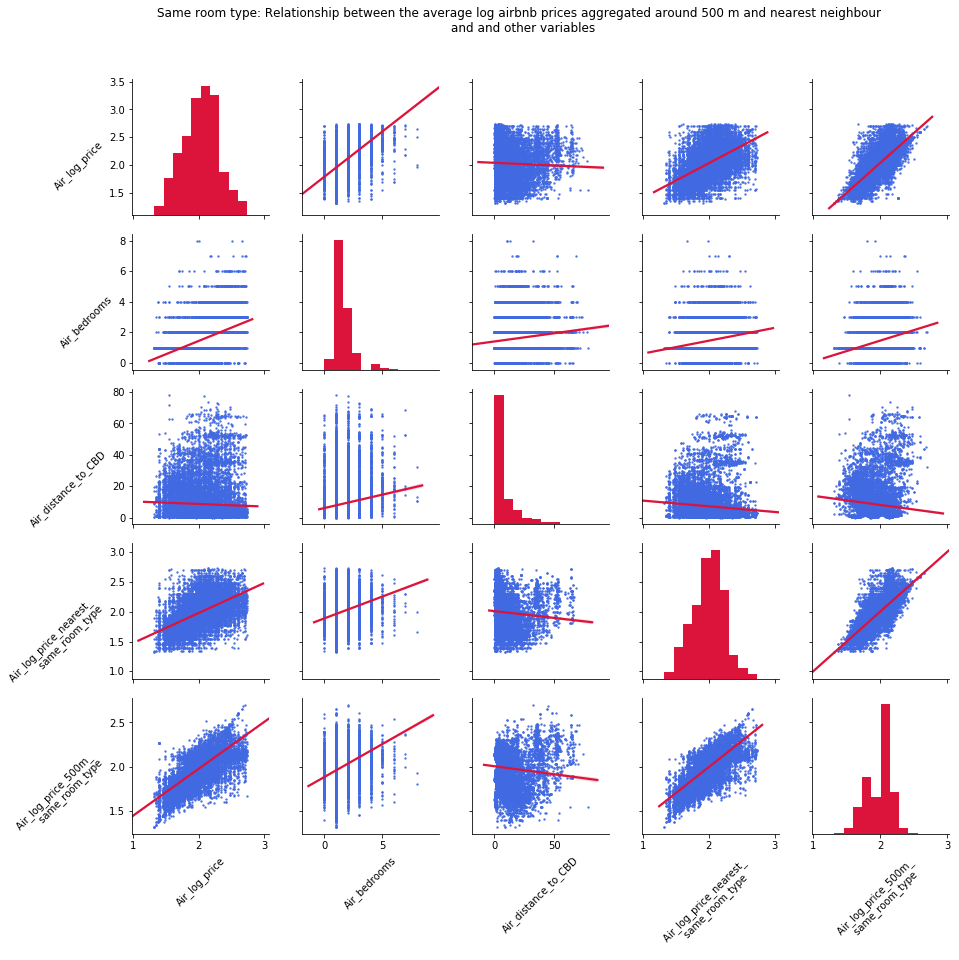

In [180]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_distance_to_CBD', 
                     'Air_log_price_nearest_same_room_type', 'Air_log_price_500m_same_room_type']]

tmp.rename(columns={'Air_log_price_nearest_same_room_type': 'Air_log_price_nearest_ \n same_room_type',
                   'Air_log_price_500m_same_room_type': 'Air_log_price_500m_ \n same_room_type'},
                    inplace=True)
tmp.replace([np.inf, -np.inf], np.nan, inplace=True)
g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Same room type: Relationship between the average log airbnb prices aggregated around 500 m and nearest neighbour \n and and other variables")
g.fig.subplots_adjust(top=0.9);

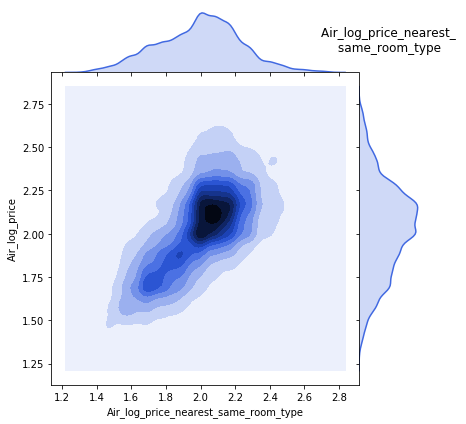

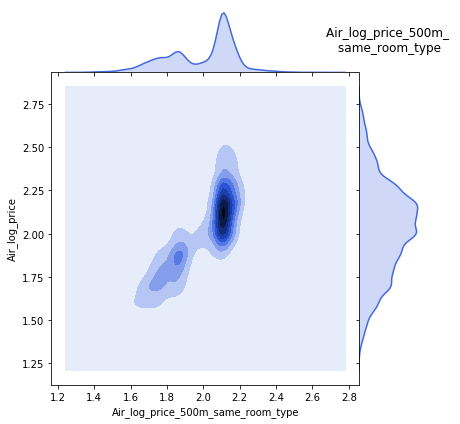

In [181]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_distance_to_CBD', 
                     'Air_log_price_nearest_same_room_type', 'Air_log_price_500m_same_room_type']]

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='Air_log_price_nearest_same_room_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_nearest_ \n same_room_type \n')

sns.jointplot(x='Air_log_price_500m_same_room_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_500m_ \n same_room_type \n');

In [182]:
tmp.dropna().shape # 20669

(20669, 5)

The effect of the nearest airbnb accommodations is not influenced by the distance as the following plots show.

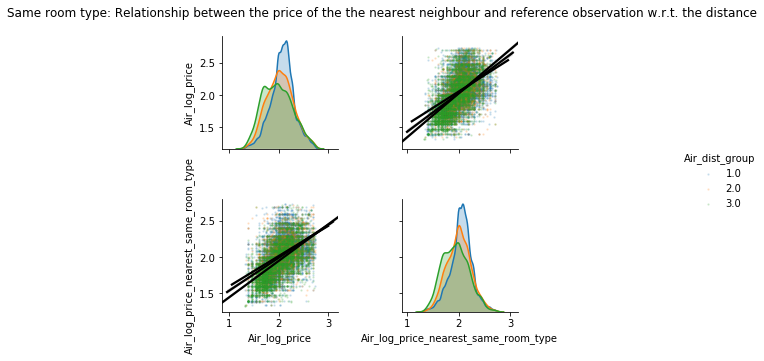

In [183]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_log_price_nearest_same_room_type',
                    'Air_dist_group']]
tmp.replace([np.inf, -np.inf], np.nan, inplace=True)
g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws': {'color':'black'}, 'scatter_kws': {'alpha':0.15, 's': 2}},
            hue='Air_dist_group',
            vars=['Air_log_price', 'Air_log_price_nearest_same_room_type']);
g.fig.suptitle("Same room type: Relationship between the price of the the nearest neighbour and reference observation w.r.t. the distance")
g.fig.subplots_adjust(top=0.9);

The two other variants of the aggregation, i.e. with radius 100 m and 50 m, show a very similar relationship as the plots below show. The pairplots also illustrate that the different price measures are correlated to each other. This was to some extent clear from the beginning on since the information used in the measures is not completely new. However, the alternative measures (i.e. `Air_log_price_50m_same_room_type`, `Air_log_price_100m_same_room_type` and `Air_log_price_500m_same_room_type`) seems to show a stronger effect and a higher correlation.  

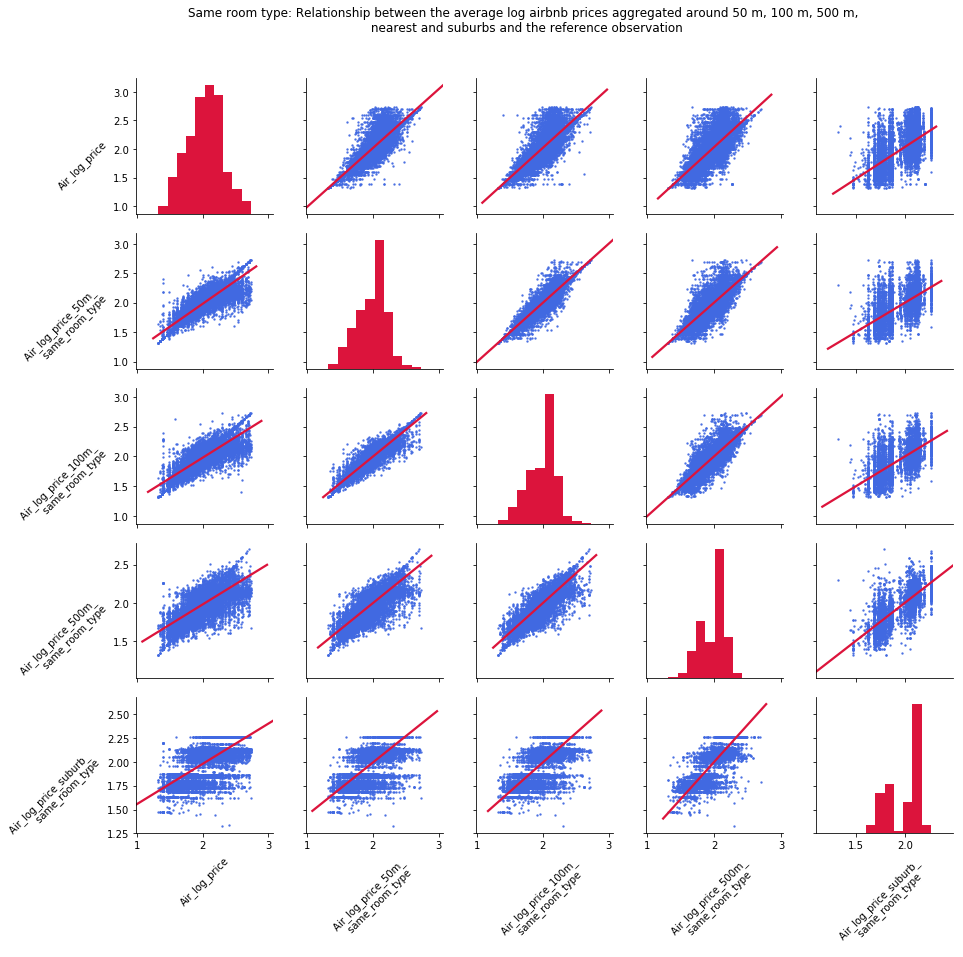

In [184]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                     'Air_log_price_50m_same_room_type',
                     'Air_log_price_100m_same_room_type',
                     'Air_log_price_500m_same_room_type',
                     'Air_log_price_suburb_same_room_type']]

tmp.rename(columns={'Air_log_price_50m_same_room_type': 'Air_log_price_50m_ \n same_room_type',
                    'Air_log_price_100m_same_room_type': 'Air_log_price_100m_ \n same_room_type',
                    'Air_log_price_500m_same_room_type': 'Air_log_price_500m_ \n same_room_type',
                    'Air_log_price_suburb_same_room_type': 'Air_log_price_suburb_ \n same_room_type'},
                    inplace=True)

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})

#https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
#p.set_yticklabels(p.get_yticklabels(), rotation=45, horizontalalignment='right')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Same room type: Relationship between the average log airbnb prices aggregated around 50 m, 100 m, 500 m, \n nearest and suburbs and the reference observation")
g.fig.subplots_adjust(top=0.9);

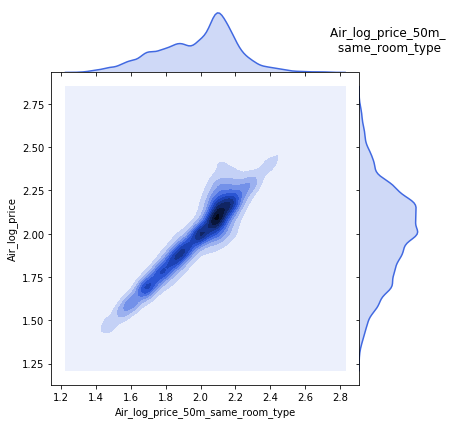

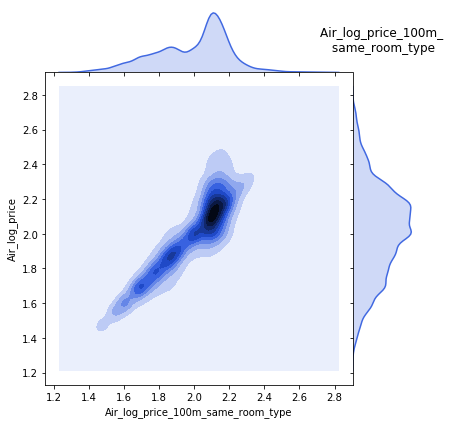

In [185]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                     'Air_log_price_50m_same_room_type',
                     'Air_log_price_100m_same_room_type',
                     'Air_log_price_500m_same_room_type',
                     'Air_log_price_suburb_same_room_type']]

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='Air_log_price_50m_same_room_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_50m_ \n same_room_type \n')

sns.jointplot(x='Air_log_price_100m_same_room_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_100m_ \n same_room_type \n');

In [186]:
tmp.dropna().shape # 19836

(19836, 5)

*Property type*

We take a look at the effects when the property type of the reference observation and the property type of the observations whose prices are aggregated are the same. The effects are weaker than for the same room types (see above).

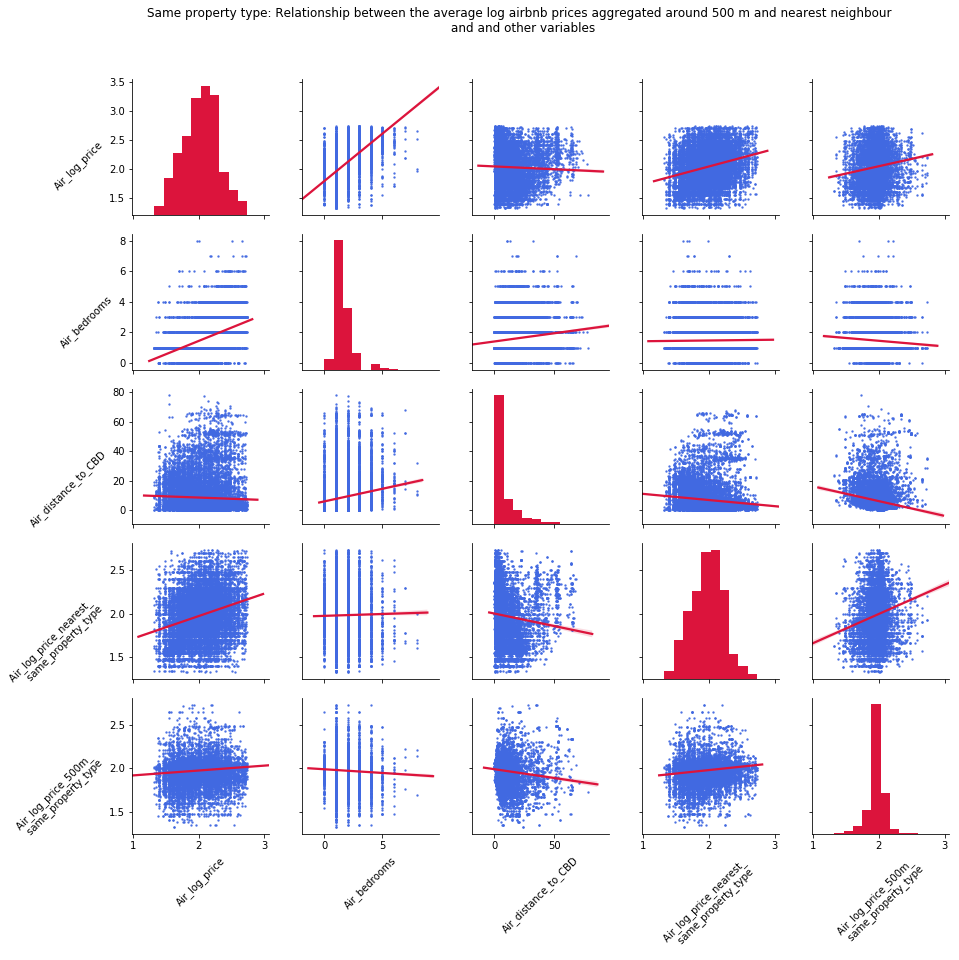

In [187]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_distance_to_CBD', 
                     'Air_log_price_nearest_same_property_type', 'Air_log_price_500m_same_property_type']]

tmp.rename(columns={'Air_log_price_nearest_same_property_type': 'Air_log_price_nearest_ \n same_property_type',
                    'Air_log_price_500m_same_property_type': 'Air_log_price_500m_ \n same_property_type'},
                    inplace=True)

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Same property type: Relationship between the average log airbnb prices aggregated around 500 m and nearest neighbour \n and and other variables")
g.fig.subplots_adjust(top=0.9);

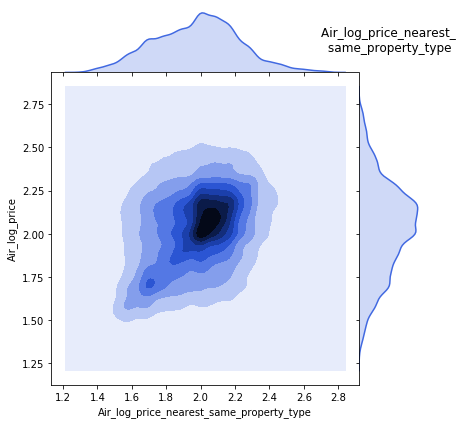

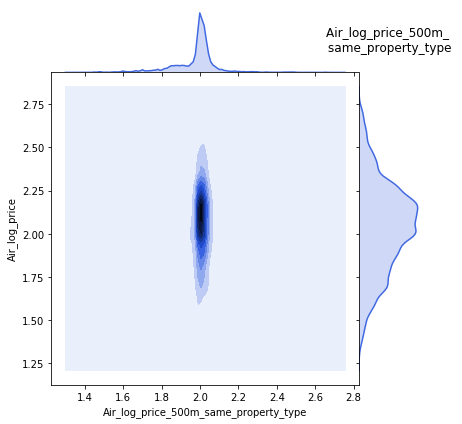

In [188]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price', 'Air_bedrooms', 'Air_distance_to_CBD', 
                     'Air_log_price_nearest_same_property_type', 'Air_log_price_500m_same_property_type']]

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='Air_log_price_nearest_same_property_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_nearest_ \n same_property_type \n')

sns.jointplot(x='Air_log_price_500m_same_property_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_500m_ \n same_property_type \n');

In [189]:
tmp.dropna().shape # 18464

(18464, 5)

In the next pairplot the different types of aggregation `Air_log_price_50m_same_property_type`, `Air_log_price_100m_same_property_type`, `Air_log_price_500m_same_property_type`, `Air_log_price_nearest_same_property_type` and `Air_log_price_suburb_same_property_type` are plotted. As already mentioned, the constructed price measures are positively correlated to the airbnb price of the reference object. However, the effects are less pronounced than in the case of considering prices of the same room type.

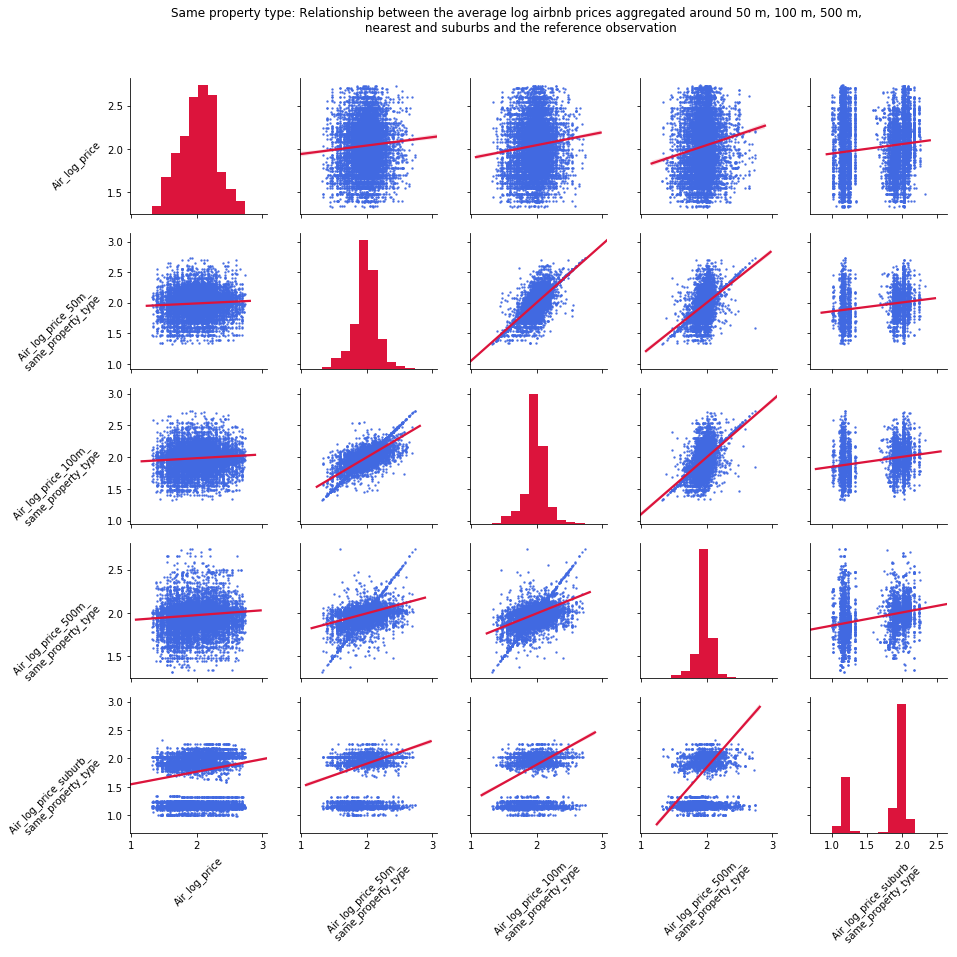

In [190]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                     'Air_log_price_50m_same_property_type',
                     'Air_log_price_100m_same_property_type',
                     'Air_log_price_500m_same_property_type',
                     'Air_log_price_suburb_same_property_type']]

tmp.rename(columns={'Air_log_price_50m_same_property_type': 'Air_log_price_50m_ \n same_property_type',
                    'Air_log_price_100m_same_property_type': 'Air_log_price_100m_ \n same_property_type',
                    'Air_log_price_500m_same_property_type': 'Air_log_price_500m_ \n same_property_type',
                    'Air_log_price_suburb_same_property_type': 'Air_log_price_suburb_ \n same_property_type'},
                    inplace=True)

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})
#https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
#p.set_yticklabels(p.get_yticklabels(), rotation=45, horizontalalignment='right')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Same property type: Relationship between the average log airbnb prices aggregated around 50 m, 100 m, 500 m, \n nearest and suburbs and the reference observation")
g.fig.subplots_adjust(top=0.9);

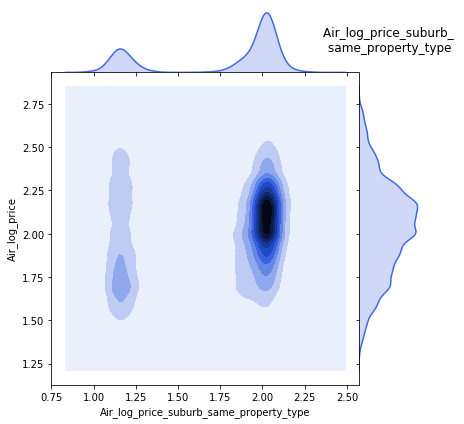

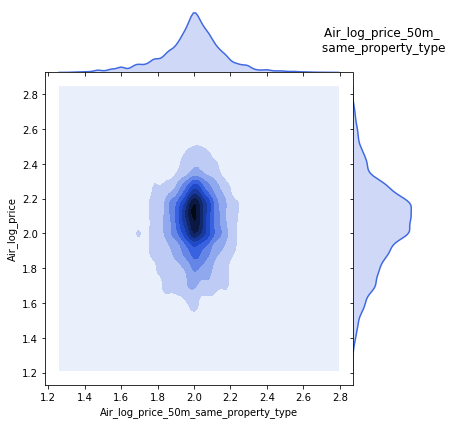

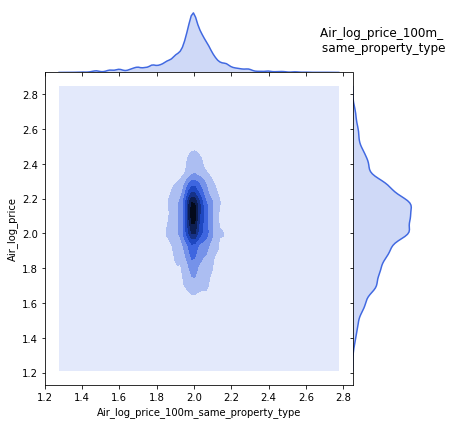

In [191]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                     'Air_log_price_50m_same_property_type',
                     'Air_log_price_100m_same_property_type',
                     'Air_log_price_500m_same_property_type',
                     'Air_log_price_suburb_same_property_type']]

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='Air_log_price_suburb_same_property_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_suburb_ \n same_property_type \n')

sns.jointplot(x='Air_log_price_50m_same_property_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_50m_ \n same_property_type \n')

sns.jointplot(x='Air_log_price_100m_same_property_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_100m_ \n same_property_type \n');

In [192]:
tmp.dropna().shape # 12730

(12730, 5)

#### Airbnb prices and housing market 

From a theoretical point of view it seems reasonable that house prices and airbnb prices are positively correlated because both are the result of a suburb's attractiveness. The house types `h`, `u` and `t` are linked to `House_Cottage_Villa`, `Apartment_Condominium` and `Townhouse`, respectively.

**Aggregation by suburbs**

The first step is to inspect the average house prices aggregated by suburbs. No positive relationship between airbnb prices and housing prices that are aggregated by suburbs can be observed.

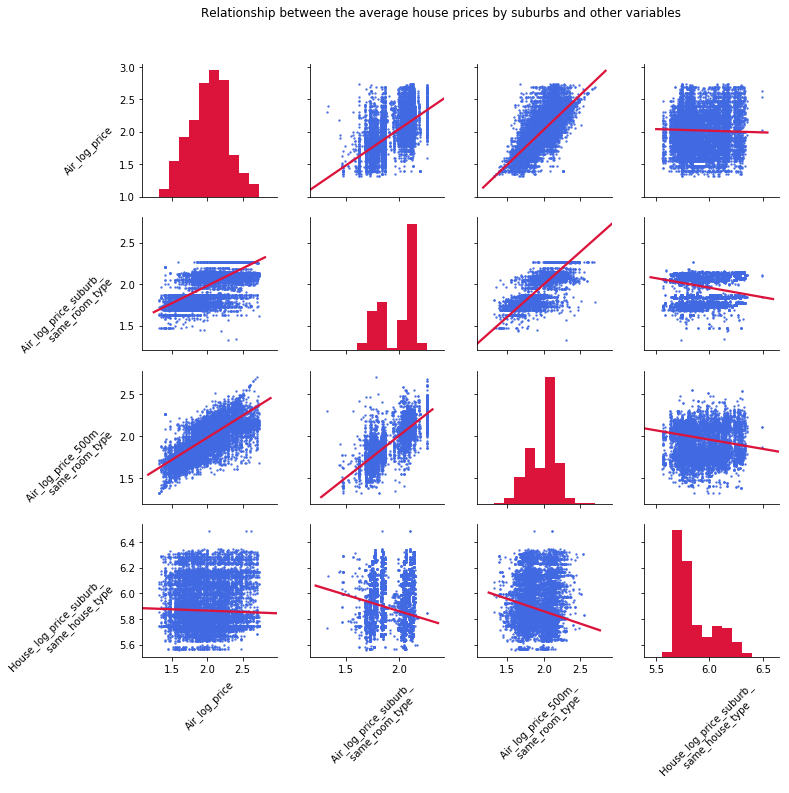

In [193]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                     'Air_log_price_suburb_same_room_type',
                     'Air_log_price_500m_same_room_type',
                     'House_log_price_suburb_same_house_type']]

tmp.rename(columns={'Air_log_price_suburb_same_room_type': 'Air_log_price_suburb_ \n same_room_type',
                    'Air_log_price_500m_same_room_type': 'Air_log_price_500m_ \n same_room_type',
                    'House_log_price_suburb_same_house_type': 'House_log_price_suburb_ \n same_house_type'},
                    inplace=True)

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})
#https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
#p.set_yticklabels(p.get_yticklabels(), rotation=45, horizontalalignment='right')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Relationship between the average house prices by suburbs and other variables")
g.fig.subplots_adjust(top=0.9);

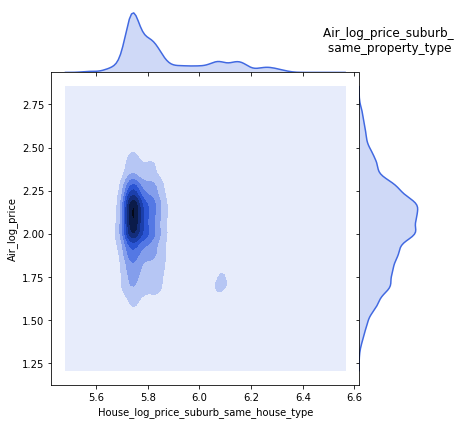

In [194]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                     'Air_log_price_suburb_same_room_type',
                     'Air_log_price_500m_same_room_type',
                     'House_log_price_suburb_same_house_type']]

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='House_log_price_suburb_same_house_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_log_price_suburb_ \n same_property_type \n');

In [195]:
tmp.dropna().shape # 17602

(17602, 4)

**Constructed aggregations**

The variables `House_log_price_500m_same_house_type`, `House_log_price_1km_same_house_type` and `House_log_price_5km_same_house_type` do not show a positive relationship with log airbnb prices. Hence, none of the house price variables tested seem to be a model candidate for predicting airbnb prices.

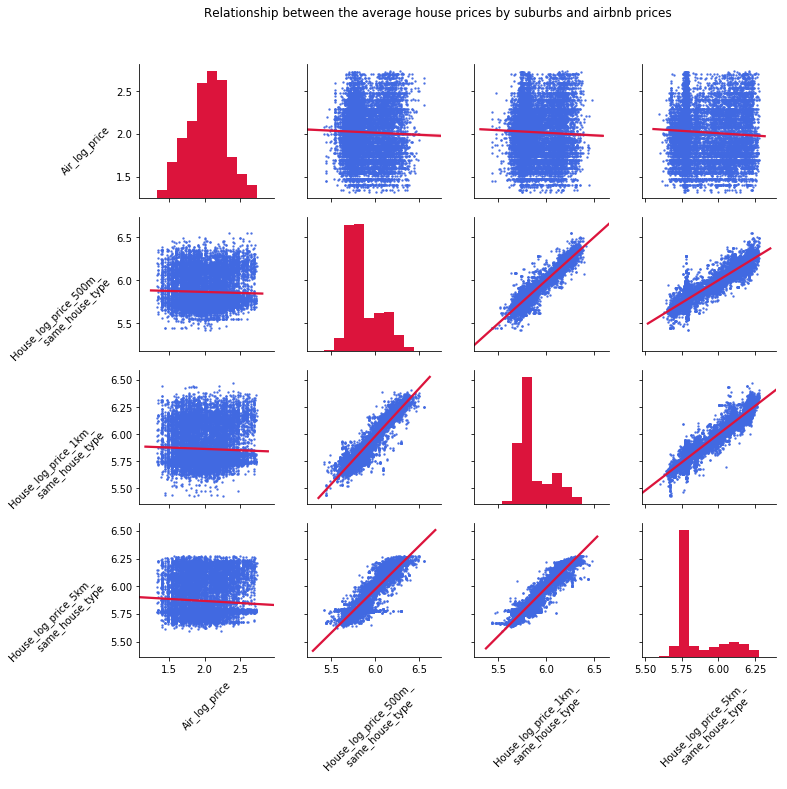

In [196]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                     'House_log_price_500m_same_house_type',
                     'House_log_price_1km_same_house_type',
                     'House_log_price_5km_same_house_type']]

tmp.rename(columns={'House_log_price_500m_same_house_type': 'House_log_price_500m_ \n same_house_type',
                    'House_log_price_1km_same_house_type': 'House_log_price_1km_ \n same_house_type',
                    'House_log_price_5km_same_house_type': 'House_log_price_5km_ \n same_house_type'},
                    inplace=True)

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})

#https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
#p.set_yticklabels(p.get_yticklabels(), rotation=45, horizontalalignment='right')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Relationship between the average house prices by suburbs and airbnb prices")
g.fig.subplots_adjust(top=0.9);

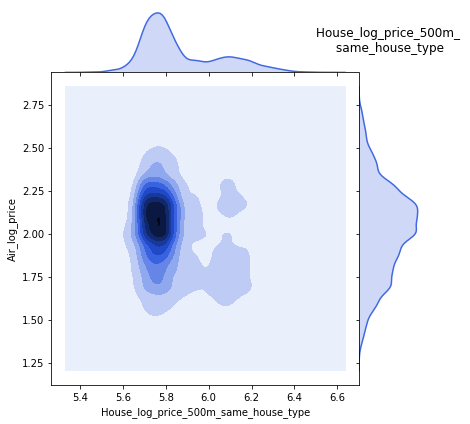

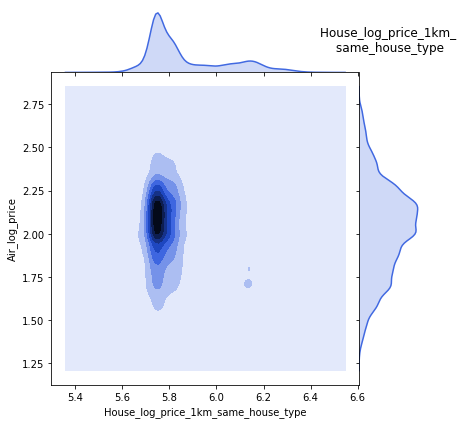

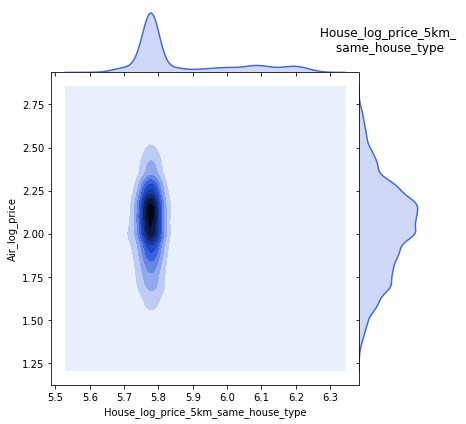

In [197]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                     'House_log_price_500m_same_house_type',
                     'House_log_price_1km_same_house_type',
                     'House_log_price_5km_same_house_type']]

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='House_log_price_500m_same_house_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('House_log_price_500m_ \n same_house_type \n')

sns.jointplot(x='House_log_price_1km_same_house_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('House_log_price_1km_ \n same_house_type \n')

sns.jointplot(x='House_log_price_5km_same_house_type', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('House_log_price_5km_ \n same_house_type \n');

In [198]:
tmp.dropna().shape # 16421

(16421, 4)

#### Crimes

Xu, Kim and Pennington-Gray conclude in their paper that "Airbnb is positively related with property crime and negatively related with violent crime" (p. 9). Hence, it might be interesting to analyze how crime activity is related to the number of competitors and to airbnb prices.

*Airbnb prices*

We first start with the airbnb prices. We observe very weak relationships. For instance, `crimes against the person` is weakly positively and `property and deception offences` is weakly negatively correlated to airbnb prices. The effects are the opposite of what we expected by arguing that high airbnb activity simultaneously results in a high property crime rate and higher prices.

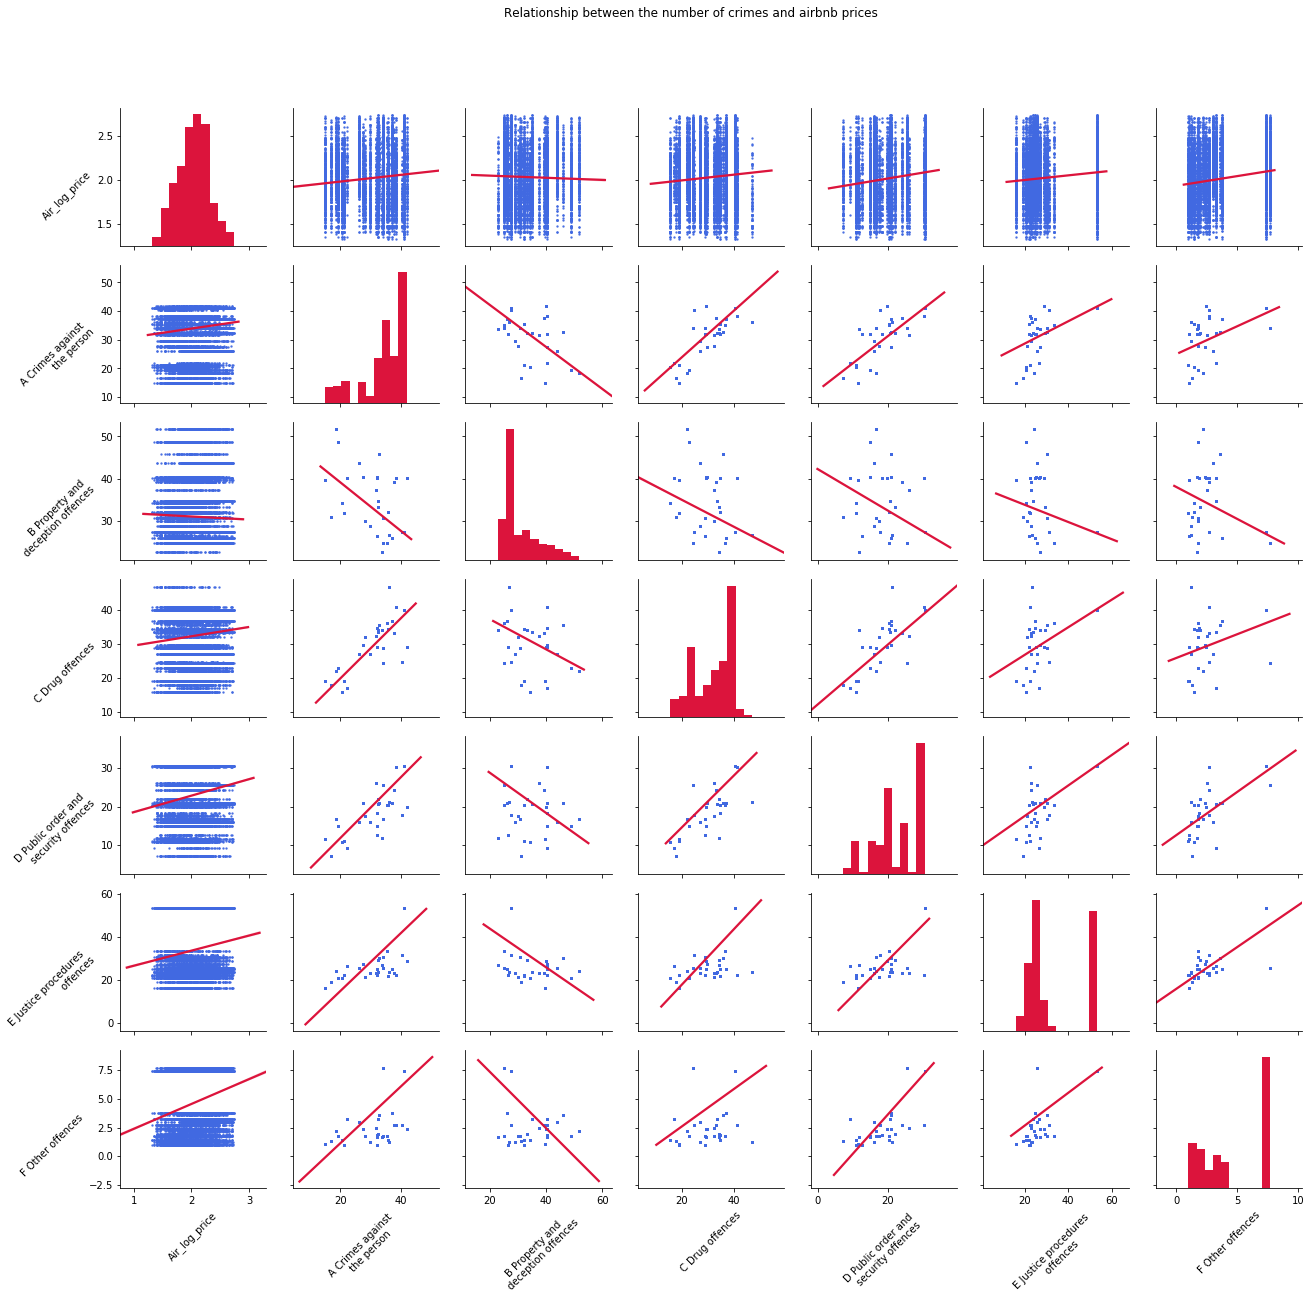

In [199]:
tmp = merged_wo_outliers.loc[:, 
                 ['Air_log_price',
                  'Crime_lga_rate_per_100000_population_A Crimes against the person',
                  'Crime_lga_rate_per_100000_population_B Property and deception offences',
                  'Crime_lga_rate_per_100000_population_C Drug offences',
                  'Crime_lga_rate_per_100000_population_D Public order and security offences',
                  'Crime_lga_rate_per_100000_population_E Justice procedures offences',
                  'Crime_lga_rate_per_100000_population_F Other offences']]

tmp.rename(columns={'Crime_lga_rate_per_100000_population_A Crimes against the person':'A Crimes against \n the person',
                   'Crime_lga_rate_per_100000_population_B Property and deception offences': 'B Property and \n deception offences',
                   'Crime_lga_rate_per_100000_population_C Drug offences': 'C Drug offences',
                   'Crime_lga_rate_per_100000_population_D Public order and security offences': 'D Public order and \n security offences',
                   'Crime_lga_rate_per_100000_population_E Justice procedures offences': 'E Justice procedures \n offences',
                   'Crime_lga_rate_per_100000_population_F Other offences': 'F Other offences'}
           , inplace=True)

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})

#https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
#p.set_yticklabels(p.get_yticklabels(), rotation=45, horizontalalignment='right')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Relationship between the number of crimes and airbnb prices")
g.fig.subplots_adjust(top=0.9);

In [200]:
tmp.dropna().shape # 22294

(22294, 7)

*Competition*

Let's assume that airbnb actvity can be measured properly by the number of airbnb accommodations within a given radius. According to the study of Xu, Kim and Pennington-Gray 'crimes against the person' should be low and 'property crimes' should be high, but this does not hold for our dataset as it is shown by the pairplots.

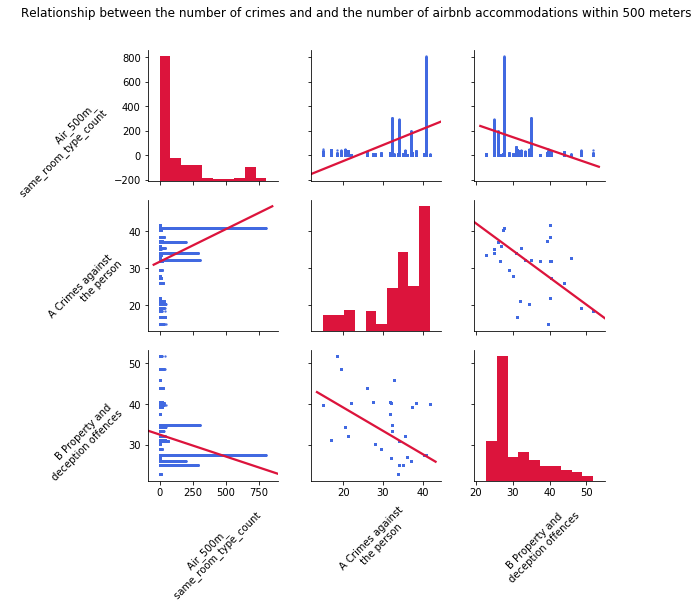

In [201]:
tmp = merged_wo_outliers.loc[:, ['Air_500m_same_room_type_count',
                                 'Crime_lga_rate_per_100000_population_A Crimes against the person',
                                 'Crime_lga_rate_per_100000_population_B Property and deception offences']]

tmp.rename(columns={'Air_500m_same_room_type_count': 'Air_500m_ \n same_room_type_count',
                    'Crime_lga_rate_per_100000_population_A Crimes against the person':'A Crimes against \n the person',
                    'Crime_lga_rate_per_100000_population_B Property and deception offences': 'B Property and \n deception offences'}
           , inplace=True)

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})

#https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
#p.set_yticklabels(p.get_yticklabels(), rotation=45, horizontalalignment='right')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Relationship between the number of crimes and and the number of airbnb accommodations within 500 meters")
g.fig.subplots_adjust(top=0.9);

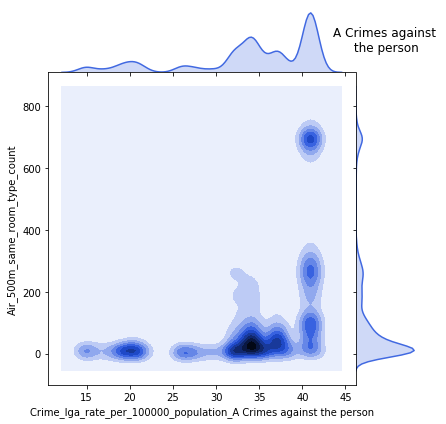

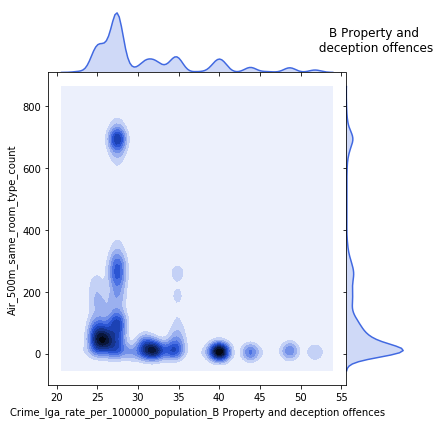

In [202]:
tmp = merged_wo_outliers.loc[:, ['Air_500m_same_room_type_count',
                                 'Crime_lga_rate_per_100000_population_A Crimes against the person',
                                 'Crime_lga_rate_per_100000_population_B Property and deception offences']]

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='Crime_lga_rate_per_100000_population_A Crimes against the person', y='Air_500m_same_room_type_count', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('A Crimes against \n the person \n')

sns.jointplot(x='Crime_lga_rate_per_100000_population_B Property and deception offences', y='Air_500m_same_room_type_count', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('B Property and \n deception offences \n');

In [203]:
tmp.dropna().shape # 21658

(21658, 3)

#### Airbnb prices and competition

Airbnb competition might affect the prices for accommodations. The plots are shown below. No clear relationship can be observed.

*Room type*

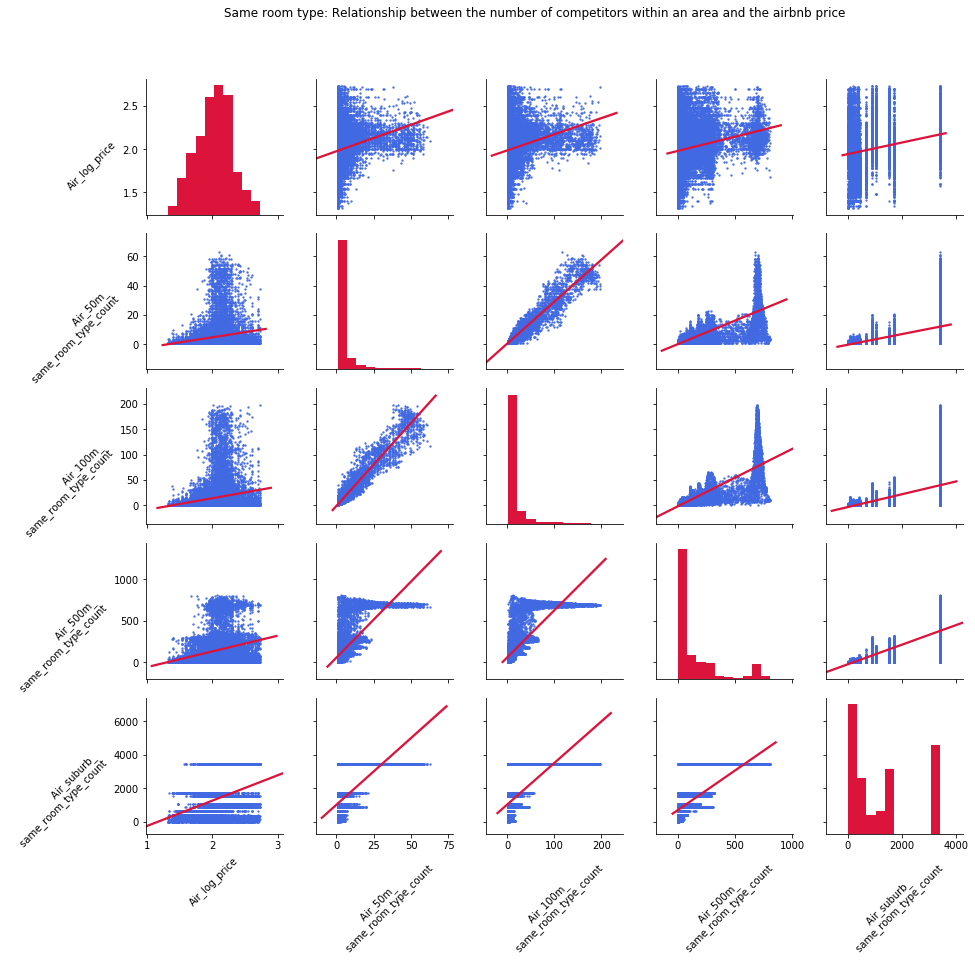

In [204]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                                 'Air_50m_same_room_type_count',
                                 'Air_100m_same_room_type_count',
                                 'Air_500m_same_room_type_count',
                                 'Air_suburb_same_room_type_count']]

tmp.rename(columns={'Air_50m_same_room_type_count': 'Air_50m_ \n same_room_type_count',
                    'Air_100m_same_room_type_count': 'Air_100m_ \n same_room_type_count',
                    'Air_500m_same_room_type_count': 'Air_500m_ \n same_room_type_count',
                    'Air_suburb_same_room_type_count': 'Air_suburb_ \n same_room_type_count'},
                    inplace=True)

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})

#https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
#p.set_yticklabels(p.get_yticklabels(), rotation=45, horizontalalignment='right')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Same room type: Relationship between the number of competitors within an area and the airbnb price")
g.fig.subplots_adjust(top=0.9);

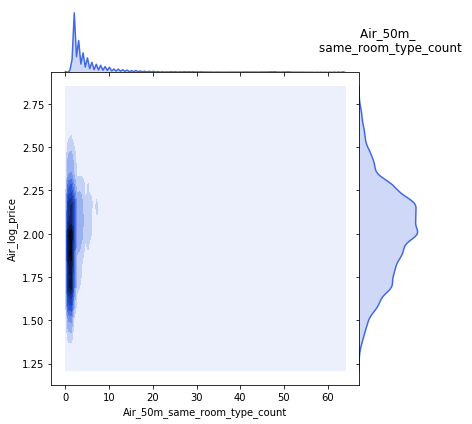

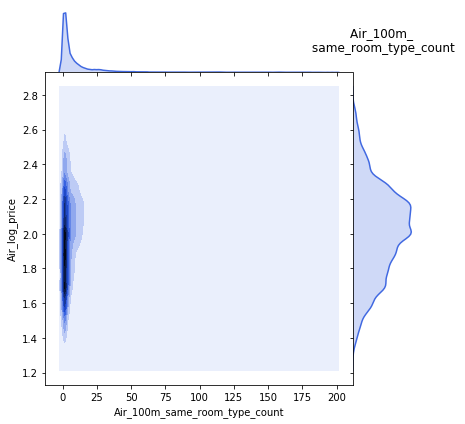

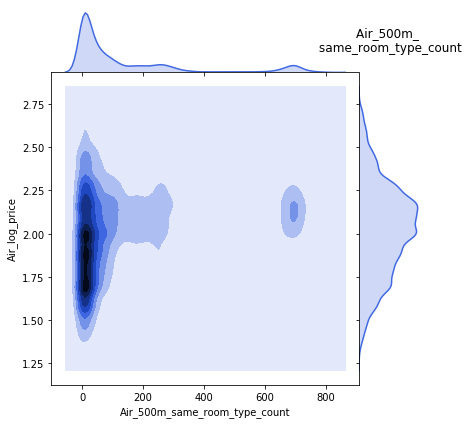

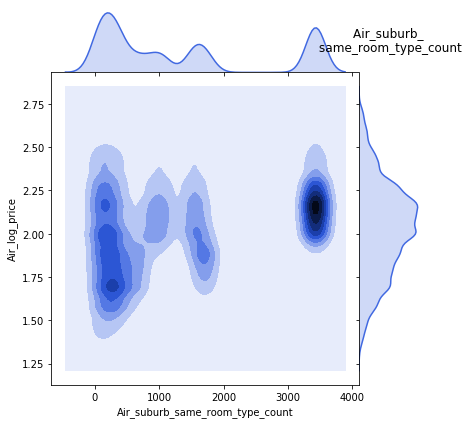

In [205]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                                 'Air_50m_same_room_type_count',
                                 'Air_100m_same_room_type_count',
                                 'Air_500m_same_room_type_count',
                                 'Air_suburb_same_room_type_count']]

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='Air_50m_same_room_type_count', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_50m_ \n same_room_type_count \n')

sns.jointplot(x='Air_100m_same_room_type_count', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_100m_ \n same_room_type_count \n')

sns.jointplot(x='Air_500m_same_room_type_count', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_500m_ \n same_room_type_count \n')

sns.jointplot(x='Air_suburb_same_room_type_count', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_suburb_ \n same_room_type_count \n');

In [206]:
tmp.dropna().shape # 19842

(19842, 5)

*Property type*

The same holds when the aggregated airbnb prices are matched by the same property. However, the effect is even less pronounced in this case.

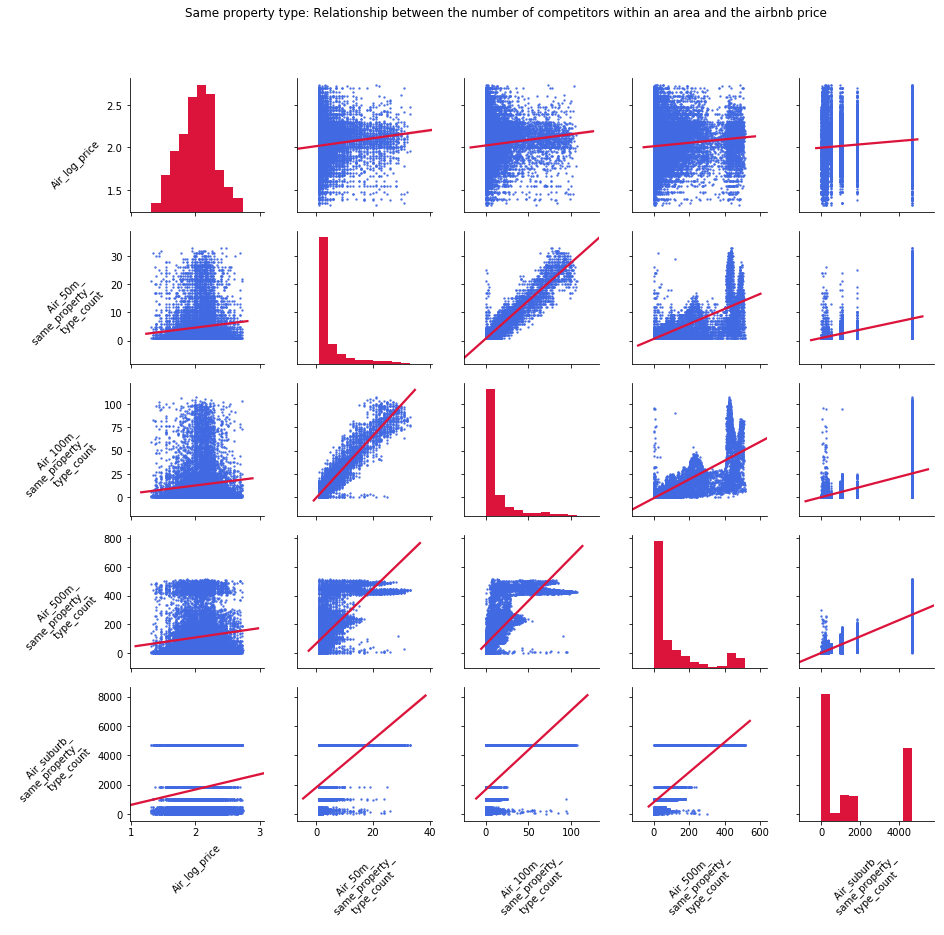

In [207]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                     'Air_50m_same_property_type_count',
                     'Air_100m_same_property_type_count',
                     'Air_500m_same_property_type_count',
                     'Air_suburb_same_property_type_count']]

tmp.rename(columns={'Air_50m_same_property_type_count': 'Air_50m_ \n same_property_ \n type_count',
                    'Air_100m_same_property_type_count': 'Air_100m_ \n same_property_ \n type_count',
                    'Air_500m_same_property_type_count': 'Air_500m_ \n same_property_ \n type_count',
                    'Air_suburb_same_property_type_count': 'Air_suburb_ \n same_property_ \n type_count'},
                    inplace=True)

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.pairplot(tmp, kind="reg", plot_kws={'line_kws':{'color':col2}, 'scatter_kws': {'color': col1, 's': 2}},
    diag_kws = {'color': col2})

#https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
#p.set_yticklabels(p.get_yticklabels(), rotation=45, horizontalalignment='right')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.suptitle("Same property type: Relationship between the number of competitors within an area and the airbnb price")
g.fig.subplots_adjust(top=0.9);

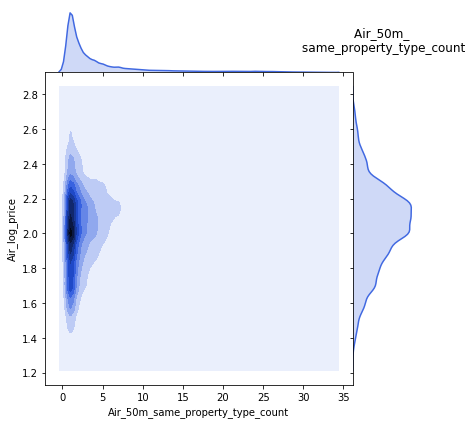

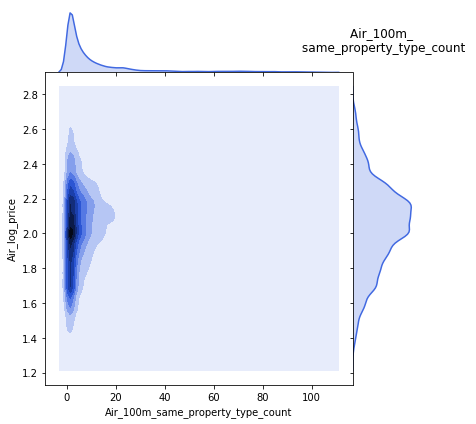

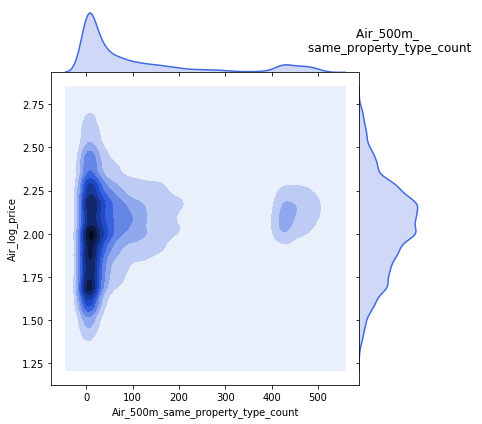

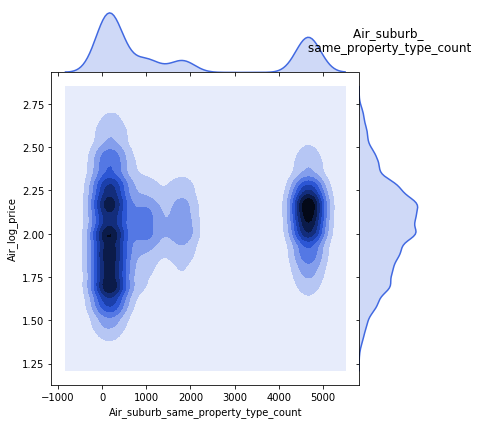

In [208]:
tmp = merged_wo_outliers.loc[:, ['Air_log_price',
                                 'Air_50m_same_property_type_count',
                                 'Air_100m_same_property_type_count',
                                 'Air_500m_same_property_type_count',
                                 'Air_suburb_same_property_type_count']]

tmp.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.jointplot(x='Air_50m_same_property_type_count', y='Air_log_price', 
              data=tmp, kind="kde", 
              space=0, color=col1)
plt.title('Air_50m_ \n same_property_type_count \n')

sns.jointplot(x='Air_100m_same_property_type_count', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_100m_ \n same_property_type_count \n')

sns.jointplot(x='Air_500m_same_property_type_count', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_500m_ \n same_property_type_count \n')

sns.jointplot(x='Air_suburb_same_property_type_count', y='Air_log_price', 
              data=tmp, kind="kde",
              space=0, color=col1)
plt.title('Air_suburb_ \n same_property_type_count \n');

#### Variables

Now, we focus on the 35 variables (inclusive the target variable) with the lowest number of missing values. The variables are stored in `airbnb_vars`.

In [209]:
tmp = pd.DataFrame({'obs': airbnb_sorted_non_missing})
tmp.reset_index(level=0, inplace=True)
tmp.rename(columns={'index': 'variable'}, inplace=True)
airbnb_vars = tmp.loc[range(35), :].variable
airbnb_vars

0                                Air_price
1                      Air_availability_30
2                      Air_availability_60
3                      Air_availability_90
4                     Air_availability_365
5        Air_require_guest_profile_picture
6       Air_calculated_host_listings_count
7                               Air_street
8               Air_neighbourhood_cleansed
9                       Air_smart_location
10                   Air_is_location_exact
11                       Air_property_type
12                           Air_room_type
13                            Air_bed_type
14                    Air_instant_bookable
15                 Air_cancellation_policy
16                      Air_maximum_nights
17                      Air_minimum_nights
18                   Air_number_of_reviews
19    Air_require_guest_phone_verification
20                     Air_guests_included
21               Air_calendar_last_scraped
22                        Air_extra_people
23         

##### Categorical variables

Some of the 35 variables are categorical.

In [210]:
s = ['Air_' + el for el in ['host_is_superhost', 'host_neighbourhood', 'host_has_profile_pic', 
                      'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 
                      'city', 'state', 'zipcode', 'smart_location', 'is_location_exact', 'property_type', 
                      'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy', 
                      'require_guest_profile_picture', 'require_guest_phone_verification']]
s = set(s)
airbnb_cat_vars = set(airbnb_vars).intersection(s)
airbnb_cat_vars

{'Air_bed_type',
 'Air_cancellation_policy',
 'Air_host_has_profile_pic',
 'Air_host_identity_verified',
 'Air_host_is_superhost',
 'Air_instant_bookable',
 'Air_is_location_exact',
 'Air_neighbourhood_cleansed',
 'Air_property_type',
 'Air_require_guest_phone_verification',
 'Air_require_guest_profile_picture',
 'Air_room_type',
 'Air_smart_location',
 'Air_street'}

In [211]:
merged_cat_target = merged_wo_outliers.loc[:, ['Air_log_price'] + list(airbnb_cat_vars)]
merged_cat_target.head(5)

Air_log_price Air_require_guest_phone_verification Air_instant_bookable  \
0       1.778151                                    f                    f   
1       1.544068                                    t                    t   
2       2.201397                                    f                    f   
3       1.698970                                    f                    f   
4       1.838849                                    f                    f   

  Air_bed_type         Air_smart_location Air_neighbourhood_cleansed  \
0     Real Bed         Bulleen, Australia                 manningham   
1        Futon  Brunswick East, Australia                   moreland   
2     Real Bed        St Kilda, Australia               port phillip   
3     Real Bed       Thornbury, Australia                    darebin   
4     Real Bed   St Kilda East, Australia               port phillip   

  Air_require_guest_profile_picture Air_host_has_profile_pic  \
0                                 f                        f   
1                                 t                        t   
2                                 f                        t   
3                                 f                        t   
4                                 f                        t   

  Air_property_type    Air_room_type Air_is_location_exact  \
0             House     Private room                     f   
1         Apartment     Private room                     t   
2         Apartment  Entire home/apt                     t   
3             House     Private room                     t   
4             House     Private room                     t   

  Air_host_is_superhost                      Air_street  \
0                     f         Bulleen, VIC, Australia   
1                     f  Brunswick East, VIC, Australia   
2                     t        St Kilda, VIC, Australia   
3                     f       Thornbury, VIC, Australia   
4                     f   St Kilda East, VIC, Australia   

       Air_cancellation_policy Air_host_identity_verified  
0  strict_14_with_grace_period                          f  
1                     moderate                          t  
2  strict_14_with_grace_period                          t  
3                     moderate                          t  
4                     moderate                          t

The variables `Air_smart_location` and `Air_street` are excluded for now because they have a lot of different values, which is a problem for the plotting.

In [212]:
airbnb_cat_vars.remove('Air_smart_location') # too many values
airbnb_cat_vars.remove('Air_street') # too many values

Next, we create boxplots to see whether some values of the variables coincide show higher log airbnb prices. Differences can be observed for the variables `Air_cancellation_policy`, `Air_bed_type`, `Air_neighbourhood_cleansed`, `Air_property_type` and `Air_room_type`. The variables `Air_neighbourhood_cleansed`, `Air_property_type` and `Air_room_type` were already part of the analyses of the aggregated airbnb prices. 

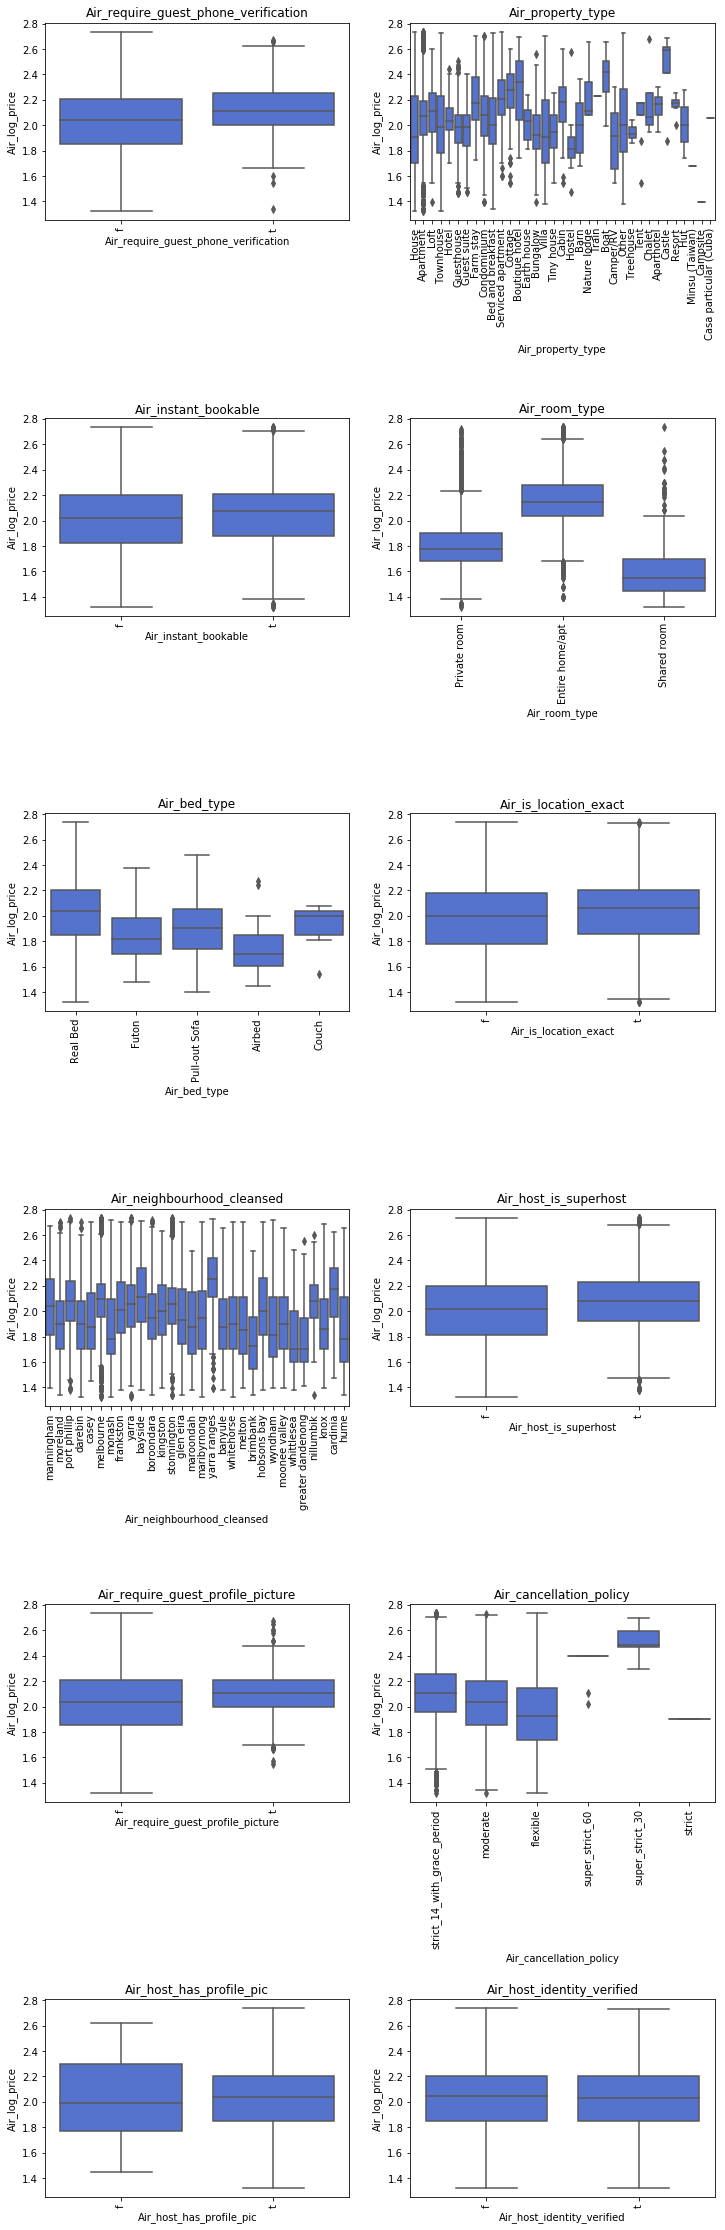

In [213]:
fig, axes = plt.subplots(6, 2, figsize=(12, 40))

fig.subplots_adjust(hspace=1)

n = int(np.ceil(len(airbnb_cat_vars)/2))

for i,v in enumerate(airbnb_cat_vars):
    if i <= n-1:
        ax = sns.boxplot(y='Air_log_price', x=v, data=merged_cat_target, ax=axes[i,0], color=col1)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        ax.set_title(v)
    else:
        i = i - n
        ax = sns.boxplot(y='Air_log_price', x=v, data=merged_cat_target, ax=axes[i,1], color=col1)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        ax.set_title(v)

To finish, we take a look at the number of observations that the different categories have. We see that for some values the number of observations is very small, which lowers the predictive power of these variables.

In [214]:
for v in ['Air_cancellation_policy', 'Air_bed_type', 'Air_neighbourhood_cleansed', 'Air_property_type',
         'Air_room_type']:
    print(merged_wo_outliers[v].value_counts())
    print('')

strict_14_with_grace_period    8957
flexible                       7444
moderate                       5854
super_strict_30                  28
super_strict_60                  10
strict                            1
Name: Air_cancellation_policy, dtype: int64

Real Bed         22132
Pull-out Sofa       68
Futon               68
Airbed              17
Couch                9
Name: Air_bed_type, dtype: int64

melbourne            7210
port phillip         2726
yarra                2012
stonnington          1569
moreland              947
yarra ranges          717
darebin               681
boroondara            626
glen eira             622
whitehorse            609
monash                557
maribyrnong           432
wyndham               421
bayside               340
moonee valley         333
kingston              304
manningham            295
hobsons bay           236
banyule               198
knox                  173
frankston             172
hume                  167
casey             

##### Continuous variables

Next, we inspect the continuous variables.

In [215]:
s = ['Air_' + el for el in ['price', 'weekly_price', 'monthly_price', 'security_deposit',
                 'cleaning_fee', 'extra_people',
                 'last_scraped', 'calendar_last_scraped', 'first_review', 
                 'last_review',
                 'host_response_rate', 
                 'host_listings_count', 'host_total_listings_count',
                 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
                 'beds', 'square_feet', 'guests_included', 'minimum_nights', 
                 'maximum_nights', 'availability_30', 'availability_60',
                 'availability_90', 'availability_365', 'number_of_reviews',
                 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                 'review_scores_checkin', 'review_scores_communication', 
                 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count',
                 'reviews_per_month']]
s = set(s)
airbnb_cont_vars = set(airbnb_vars).intersection(s)
airbnb_cont_vars

{'Air_accommodates',
 'Air_availability_30',
 'Air_availability_365',
 'Air_availability_60',
 'Air_availability_90',
 'Air_bathrooms',
 'Air_bedrooms',
 'Air_beds',
 'Air_calculated_host_listings_count',
 'Air_calendar_last_scraped',
 'Air_extra_people',
 'Air_guests_included',
 'Air_host_listings_count',
 'Air_host_total_listings_count',
 'Air_last_scraped',
 'Air_latitude',
 'Air_longitude',
 'Air_maximum_nights',
 'Air_minimum_nights',
 'Air_number_of_reviews',
 'Air_price'}

We remove some variables that are not informative. Noninformative variables are `Air_calendar_last_scraped`, `Air_last_scraped`, `Air_latitude` and `Air_longitude`. The variable `Air_price` is also excluded because the `Air_log_price` is the target variable in this project.

In [216]:
airbnb_cont_vars.remove('Air_calendar_last_scraped') # Either 2018-12-07 or 2018-12-08
airbnb_cont_vars.remove('Air_last_scraped') # Either 2018-12-07 or 2018-12-08
airbnb_cont_vars.remove('Air_latitude')
airbnb_cont_vars.remove('Air_longitude')
airbnb_cont_vars.remove('Air_price')

In [217]:
merged_cont_target = merged_wo_outliers.loc[:, ['Air_log_price'] + list(airbnb_cont_vars)]
merged_cont_target.head(5)

Air_log_price  Air_minimum_nights  Air_calculated_host_listings_count  \
0       1.778151                 1.0                                 1.0   
1       1.544068                 3.0                                 1.0   
2       2.201397                 3.0                                17.0   
3       1.698970                 2.0                                 3.0   
4       1.838849                 1.0                                 1.0   

   Air_extra_people  Air_availability_30  Air_availability_60  Air_bathrooms  \
0              22.0                 30.0                 60.0            1.0   
1              15.0                  4.0                  9.0            1.0   
2              28.0                 10.0                 26.0            1.0   
3              20.0                  0.0                  0.0            1.5   
4              20.0                  2.0                 30.0            1.0   

   Air_availability_90  Air_guests_included  Air_accommodates  \
0                 90.0                  1.0               2.0   
1                 33.0                  1.0               2.0   
2                 51.0                  2.0               3.0   
3                  0.0                  1.0               1.0   
4                 60.0                  1.0               2.0   

   Air_availability_365  Air_host_listings_count  Air_maximum_nights  \
0                 365.0                      1.0               365.0   
1                 213.0                      1.0                45.0   
2                 326.0                     17.0                28.0   
3                   0.0                      3.0               200.0   
4                 328.0                      1.0                90.0   

   Air_number_of_reviews  Air_host_total_listings_count  Air_beds  \
0                    4.0                            1.0       2.0   
1                  108.0                            1.0       1.0   
2                   15.0                           17.0       2.0   
3                   29.0                            3.0       1.0   
4                   63.0                            1.0       2.0   

   Air_bedrooms  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0

The continuous variables are inspected in the next cell. The effects are rather weak but in many cases the effects are reasonable. Plausible effects are for expample the positive relationship between the airbnb log price and the follwing variables:
- `Air_calculated_host_listings_count`
- `Air_host_total_listings_count`
- `Air_host_listings_count`
- `Air_extra_people`
- `Air_guests_included`
- `Air_bathrooms`
- `Air_beds`
- `Air_bedrooms`
- `Air_accommodates`

It makes perfectly sense that better rated apartments or apartments with more beds or bedrooms cost more than smaller and downrated ones. The pairplots are shown below.

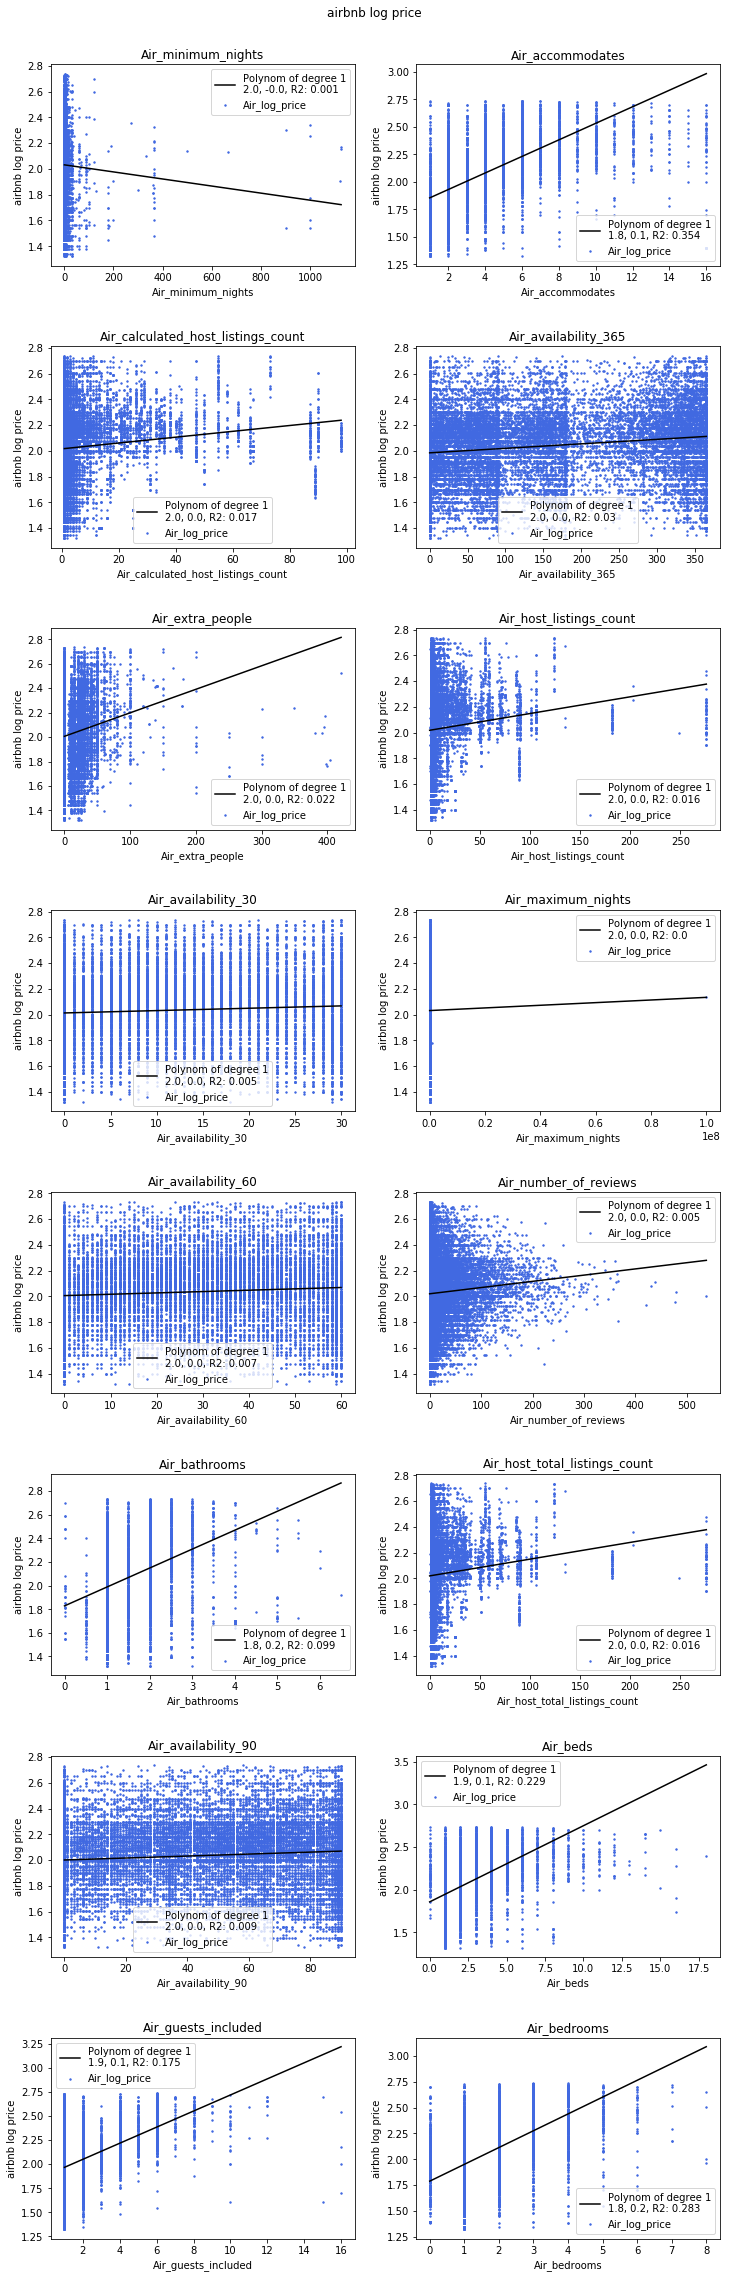

In [218]:
fig, axes = plt.subplots(8, 2, figsize=(12, 40))

fig.subplots_adjust(hspace=0.4)
fig.suptitle("airbnb log price", y=0.9)

n = int(np.ceil(len(airbnb_cont_vars)/2))
deg1 = 1
#deg2 = 3

for i,v in enumerate(airbnb_cont_vars):
    
    y = merged_cont_target.loc[:, 'Air_log_price']
    x = merged_cont_target.loc[:, v]

    res1 = polynomial(x, y, deg1)
    #res2 = polynomial(y, x, deg2)
    
    if i <= n-1:
        j = 0
        
    else:
        i = i - n
        j = 1
        
    axes[i,j].scatter(x,y, color=col1, s=2)
    axes[i,j].plot(res1['data'].x_1, res1['data'].y_pred, color="black", label="Polynom of degree " + str(deg1) + 
                    '\n' + res1['coef'] + ', R2: ' + str(round(res1['r2'], 3)))
    #axes[i,j].plot(res2['data'].x_1, res2['data'].y_pred, color="black", label="Polynom of degree " + str(deg2) + 
    #                '\n' + res2['coef'] + ', R2: ' + str(round(res2['r2'], 3)), linestyle='--')
    axes[i,j].set_ylabel("airbnb log price")
    axes[i,j].set_xlabel(v)
    axes[i,j].set_title(v)
    axes[i,j].legend()

#### Additional variables

Without reducing the size of the dataset too much the following variables can also be part of the model to predict airbnb prices:

- Air_reviews_per_month                   
- Air_cleaning_fee
- Air_security_deposit
- Air_review_scores_rating                
- Air_review_scores_cleanliness            
- Air_review_scores_communication          
- Air_review_scores_accuracy               
- Air_review_scores_location               
- Air_review_scores_checkin                
- Air_review_scores_value                                      
- Air_host_response_rate                  

`Air_review_scores_rating` is a summary of `Air_review_scores_cleanliness`, `Air_review_scores_communication`, `Air_review_scores_accuracy`, `Air_review_scores_location`, `Air_review_scores_checkin` or `Air_review_scores_value`.

Let's take a look at these variables.

In [219]:
add_vars = ['Air_reviews_per_month', 'Air_cleaning_fee', 'Air_security_deposit', 'Air_review_scores_rating',
           'Air_review_scores_cleanliness', 'Air_review_scores_communication', 'Air_review_scores_accuracy',
           'Air_review_scores_location', 'Air_review_scores_checkin', 'Air_review_scores_value',
           'Air_host_response_rate']

merged_add_vars_target = merged_wo_outliers.loc[:, ['Air_log_price'] + list(add_vars)]
merged_add_vars_target.head(5)

Air_log_price  Air_reviews_per_month  Air_cleaning_fee  \
0       1.778151                   0.04               NaN   
1       1.544068                   1.50               9.0   
2       2.201397                   0.15             100.0   
3       1.698970                   0.30              15.0   
4       1.838849                   0.74              15.0   

   Air_security_deposit  Air_review_scores_rating  \
0                   NaN                      90.0   
1                   0.0                      87.0   
2                 450.0                      94.0   
3                 200.0                      94.0   
4                   NaN                      90.0   

   Air_review_scores_cleanliness  Air_review_scores_communication  \
0                           10.0                             10.0   
1                            8.0                              9.0   
2                           10.0                              9.0   
3                            9.0                             10.0   
4                            9.0                             10.0   

   Air_review_scores_accuracy  Air_review_scores_location  \
0                         9.0                         9.0   
1                         9.0                         9.0   
2                         9.0                         9.0   
3                         9.0                         9.0   
4                         9.0                        10.0   

   Air_review_scores_checkin  Air_review_scores_value  Air_host_response_rate  
0                       10.0                      9.0                     0.0  
1                        9.0                      9.0                     NaN  
2                        9.0                      9.0                   100.0  
3                       10.0                      9.0                     NaN  
4                       10.0                      9.0                   100.0

From the plots below we see that especially `Air_cleaning_fee` and to some extent `Air_review_scores_location` are informative. The other variables are not informative.

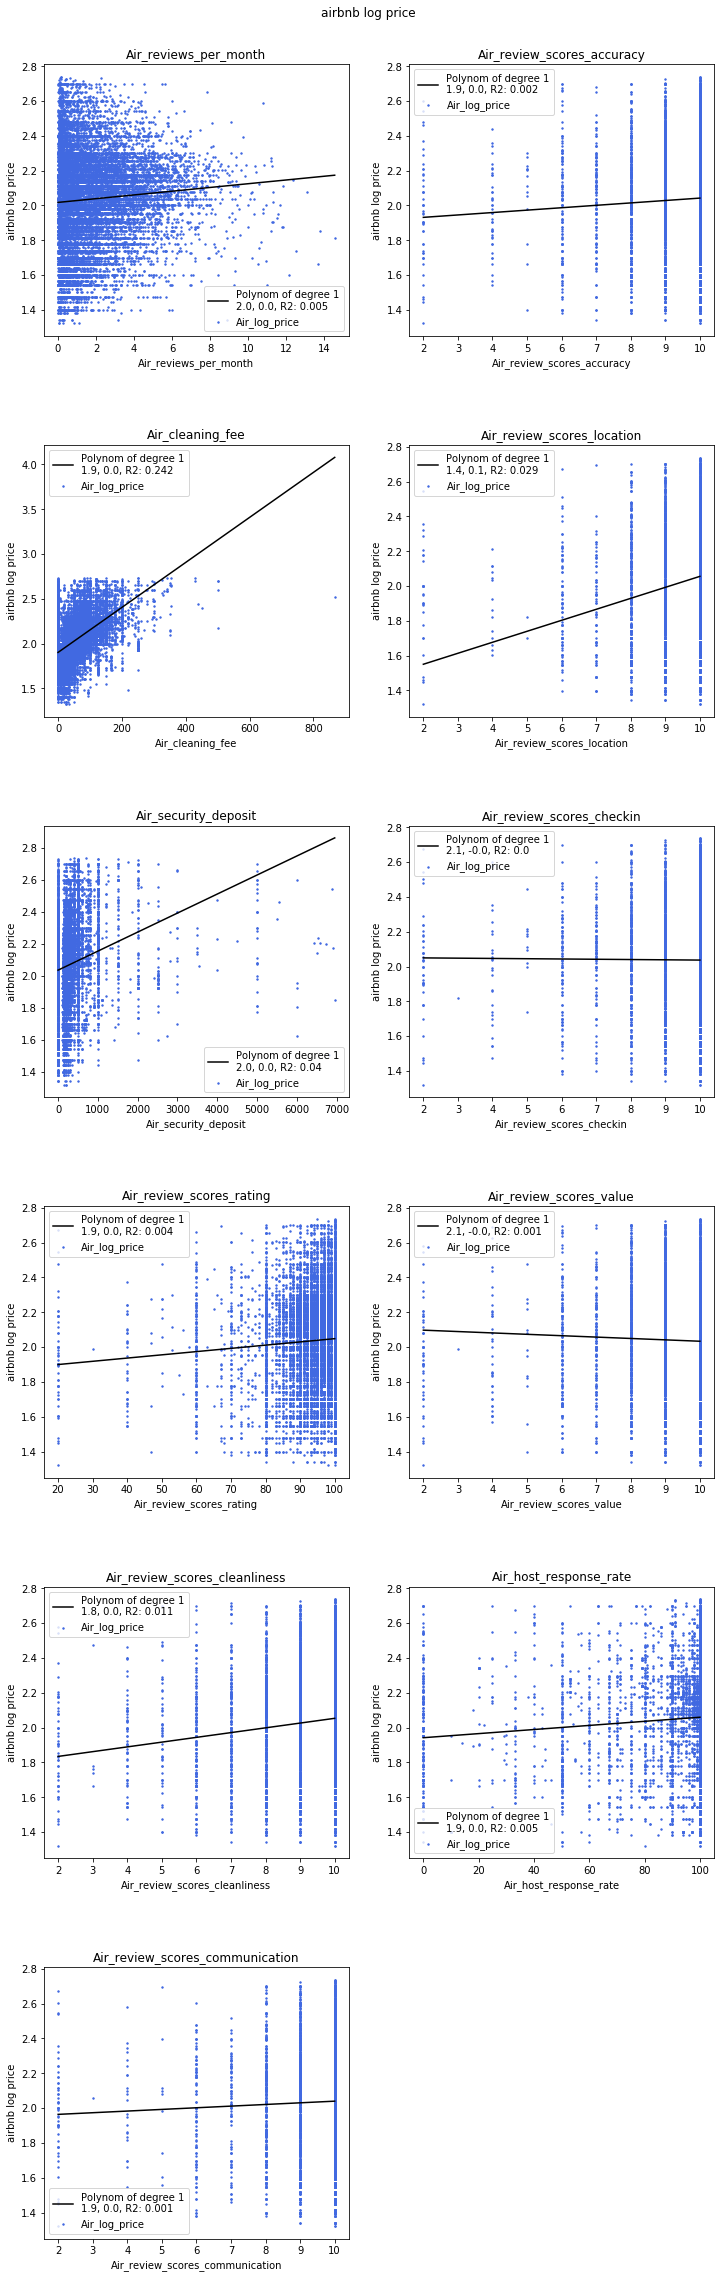

In [220]:
fig, axes = plt.subplots(6, 2, figsize=(12, 40))

fig.subplots_adjust(hspace=0.4)
fig.suptitle("airbnb log price", y=0.9)

n = int(np.ceil(len(add_vars)/2))
deg1 = 1
#deg2 = 3

for i,v in enumerate(add_vars):
    
    y = merged_add_vars_target.loc[:, 'Air_log_price']
    x = merged_add_vars_target.loc[:, v]

    res1 = polynomial(x, y, deg1)
    #res2 = polynomial(y, x, deg2)
    
    if i <= n-1:
        j = 0
        
    else:
        i = i - n
        j = 1
        
    axes[i,j].scatter(x,y, color=col1, s=2)
    axes[i,j].plot(res1['data'].x_1, res1['data'].y_pred, color="black", label="Polynom of degree " + str(deg1) + 
                    '\n' + res1['coef'] + ', R2: ' + str(round(res1['r2'], 3)))
    #axes[i,j].plot(res2['data'].x_1, res2['data'].y_pred, color="black", label="Polynom of degree " + str(deg2) + 
    #                '\n' + res2['coef'] + ', R2: ' + str(round(res2['r2'], 3)), linestyle='--')
    axes[i,j].set_ylabel("airbnb log price")
    axes[i,j].set_xlabel(v)
    axes[i,j].set_title(v)
    axes[i,j].legend()
    
axes[5,1].remove()

### (b) Findings from the EDA

The goal of the EDA was to find variables that could be part of a model to predict airbnb prices. We investigated the relationships between airbnb prices, aggregated airbnb and housing prices, crime rates and other variables as e.g. the number of bedrooms or the number of accommodates. The variables in the list below seem to be useful to predict airbnb prices. The placeholder X stands for `suburb`, `500m`, `100m`, `50m` or `nearest`. The price variables regarding neighbouring accommodations are further investigated in the next sections when we evaluate different models. `Air_bed_type ` is not considered because almost every accommodation has a real bed.

**prices and other information of neighbouring accommmodations**
- `Air_log_price_XX_same_room_type`
- `Air_accommodates_XX_same_room_type` / `Air_bathrooms_XX_same_room_type` / `Air_bedrooms_XX_same_room_type` / `Air_beds_XX_same_room_type` / `Air_guests_XX_included_same_room_type` (not used in the models)


**additional costs / additional information about the accommodation**
- `Air_cleaning_fee`

**competition**
- `Air_XX_same_room_type_count` (not used in the models)

**quality/convenience of the accommodation**
- `Air_property_type_2` 
- `Air_room_type`
- `Air_cancellation_policy` (will be regrouped later)             
- `Air_review_scores_location`               

**quality of the host**
- `Air_calculated_host_listings_count` / `Air_host_total_listings_count` / `Air_host_listings_count` (not considered)

**'hidden' information about the neighbourhood**
- `Air_neighbourhood_cleansed` 

**size of the accommodation and scope of the service**
- `Air_bathrooms` / `Air_beds` / `Air_bedrooms` / `Air_accommodates` 
- `Air_extra_people`
- `Air_guests_included`